In [459]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [460]:
y_train = pd.read_csv('C:/Users/Mass/Desktop/Sibur/train_targets.csv', parse_dates=[0], index_col=0)
X_train = pd.read_csv('C:/Users/Mass/Desktop/Sibur/train_features.csv', parse_dates=[0], index_col=0)
test = pd.read_csv('C:/Users/Mass/Desktop/Sibur/test_features.csv', parse_dates=[0], index_col=0)
sample = pd.read_csv('C:/Users/Mass/Desktop/Sibur/sample_submission.csv', parse_dates=[0], index_col=0)
sample1 = pd.read_csv('C:/Users/Mass/Desktop/Sibur/sample_submission.csv', parse_dates=[0])
sub = pd.read_csv('C:/Users/Mass/Desktop/Sibur/sub_cbr.csv', parse_dates=[0], index_col=0)

# Это 1 соревнование по анализу данных, в котором я принял участие. К сожалению приёмов, которые нужно использовать при анализе временных рядов на таком маленьком временном отрезке я не знал. Их я узнал в конце соревнования при просмотре чужих решений!

In [484]:
c = pd.concat([X_train, y_train], axis=1, join='inner')

In [485]:
feb = c.loc['2020-02-09':, :]

In [486]:
febb

A_rate     A_CH4    A_C2H6     A_C3H8   A_iC4H10  \
timestamp                                                                  
2020-02-09 00:00:00        NaN  0.144524  2.737562  42.203553  18.395980   
2020-02-09 00:30:00        NaN  0.153580  2.732064  42.253690  18.189257   
2020-02-09 01:00:00        NaN  0.157296  2.726765  42.091440  18.040847   
2020-02-09 01:30:00        NaN  0.146211  2.728743  42.052320  18.102822   
2020-02-09 02:00:00        NaN  0.130078  2.705980  42.054647  18.288487   
...                        ...       ...       ...        ...        ...   
2020-04-30 21:30:00  72.009730  0.284151  4.936343  35.758852  16.473834   
2020-04-30 22:00:00  71.854180  0.282501  4.960453  35.877193  16.448487   
2020-04-30 22:30:00  71.783273  0.277686  5.013878  36.271557  16.500147   
2020-04-30 23:00:00  71.717743  0.271106  5.080144  36.616673  16.559533   
2020-04-30 23:30:00  71.730325  0.265635  5.069165  36.602453  16.649167   

                      A_nC4H10  A_iC5H12  A_nC5H12   A_C6H14     B_rate  \
timestamp                                                                 
2020-02-09 00:00:00  25.116770  4.265102  3.696698  3.411777  39.301896   
2020-02-09 00:30:00  25.016380  4.318525  3.783097  3.523587  40.009753   
2020-02-09 01:00:00  24.992053  4.407098  3.908029  3.645566  42.493466   
2020-02-09 01:30:00  25.027353  4.415327  3.885792  3.611360  43.049704   
2020-02-09 02:00:00  25.119287  4.391632  3.790096  3.491633  43.369425   
...                        ...       ...       ...       ...        ...   
2020-04-30 21:30:00  24.318968  6.069360  5.527463  6.577563  74.183355   
2020-04-30 22:00:00  24.074193  5.981357  5.407256  6.915378  74.213066   
2020-04-30 22:30:00  24.010123  5.829363  5.160329  6.884173  74.144367   
2020-04-30 23:00:00  24.008848  5.750492  5.017941  6.642076  74.320575   
2020-04-30 23:30:00  24.150503  5.752792  4.997528  6.459137  74.327170   

                       B_C2H6     B_C3H8   B_iC4H10   B_nC4H10  
timestamp                                                       
2020-02-09 00:00:00  2.672256  39.521247  16.722926  24.561706  
2020-02-09 00:30:00  2.584262  38.791828  16.556063  24.685297  
2020-02-09 01:00:00  2.627789  40.336334  16.218371  24.256393  
2020-02-09 01:30:00  2.638928  40.242281  16.233128  24.225236  
2020-02-09 02:00:00  2.580707  39.287439  16.485867  24.625892  
...                       ...        ...        ...        ...  
2020-04-30 21:30:00  4.816865  35.539156  16.269938  24.770377  
2020-04-30 22:00:00  4.993286  36.067750  16.317757  24.729847  
2020-04-30 22:30:00  5.101574  36.275040  16.295460  24.629889  
2020-04-30 23:00:00  5.210675  36.872917  16.336359  24.438236  
2020-04-30 23:30:00  5.136487  35.860326  16.101509  24.426845  

[3936 rows x 14 columns]

In [ ]:
feb.describe()

In [ ]:
cols = feb.columns[:]

for col in feb.columns:
    pct_missing = np.mean(feb[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [ ]:
feb['A_C2H6'].plot(figsize=(16,6))

## Здесь я в ручную смотрел каждую колонку и удалял сильно большие/маленькие значения

In [388]:
feb.loc[feb['A_C2H6'] < 2.543, 'A_C2H6'] = np.NaN
feb.loc[feb['A_C2H6'] > 6.2, 'A_C2H6'] = np.NaN
feb.loc[feb['A_CH4'] > 0.35, 'A_CH4'] = np.NaN
feb.loc[feb['B_iC4H10'] < 15, 'B_iC4H10'] = np.NaN
feb.loc[feb['B_iC4H10'] > 18.8, 'B_iC4H10'] = np.NaN
feb.loc[feb['B_C3H8'] < 33, 'B_C3H8'] = np.NaN
feb.loc[feb['B_C3H8'] > 44, 'B_C3H8'] = np.NaN
feb.loc[feb['B_nC4H10'] < 22, 'B_nC4H10'] = np.NaN
feb.loc[feb['B_nC4H10'] > 25.8, 'B_nC4H10'] = np.NaN
feb.loc[feb['B_C2H6'] < 2.2, 'B_C2H6'] = np.NaN
feb.loc[feb['B_C2H6'] > 6.1, 'B_C2H6'] = np.NaN
feb.loc[feb['A_C6H14'] < 4.4, 'A_C6H14'] = np.NaN
feb.loc[feb['A_C6H14'] > 8, 'A_C6H14'] = np.NaN
feb.loc[feb['A_nC5H12'] > 5.9, 'A_nC5H12'] = np.NaN
feb.loc[feb['A_nC5H12'] < 3.6, 'A_nC5H12'] = np.NaN
feb.loc[feb['A_iC5H12'] > 6.7, 'A_iC5H12'] = np.NaN
feb.loc[feb['A_iC5H12'] < 3.8, 'A_iC5H12'] = np.NaN
feb.loc[feb['A_nC4H10'] < 22.2, 'A_nC4H10'] = np.NaN
feb.loc[feb['A_nC4H10'] > 25.4, 'A_nC4H10'] = np.NaN
feb.loc[feb['A_iC4H10'] < 15.8, 'A_iC4H10'] = np.NaN
#  A_C3H8 - я сильно подрезал
feb.loc[feb['A_C3H8'] < 35.5, 'A_C3H8'] = np.NaN
feb.loc[feb['A_rate'] < 53, 'A_rate'] = np.NaN
feb.loc[feb['B_rate'] < 57.7, 'B_rate'] = np.NaN
feb.loc[feb['B_rate'] > 77, 'B_rate'] = np.NaN

In [392]:
feb['B_rate'].fillna(feb['B_rate'].mean(), inplace=True)

<AxesSubplot:xlabel='timestamp'>

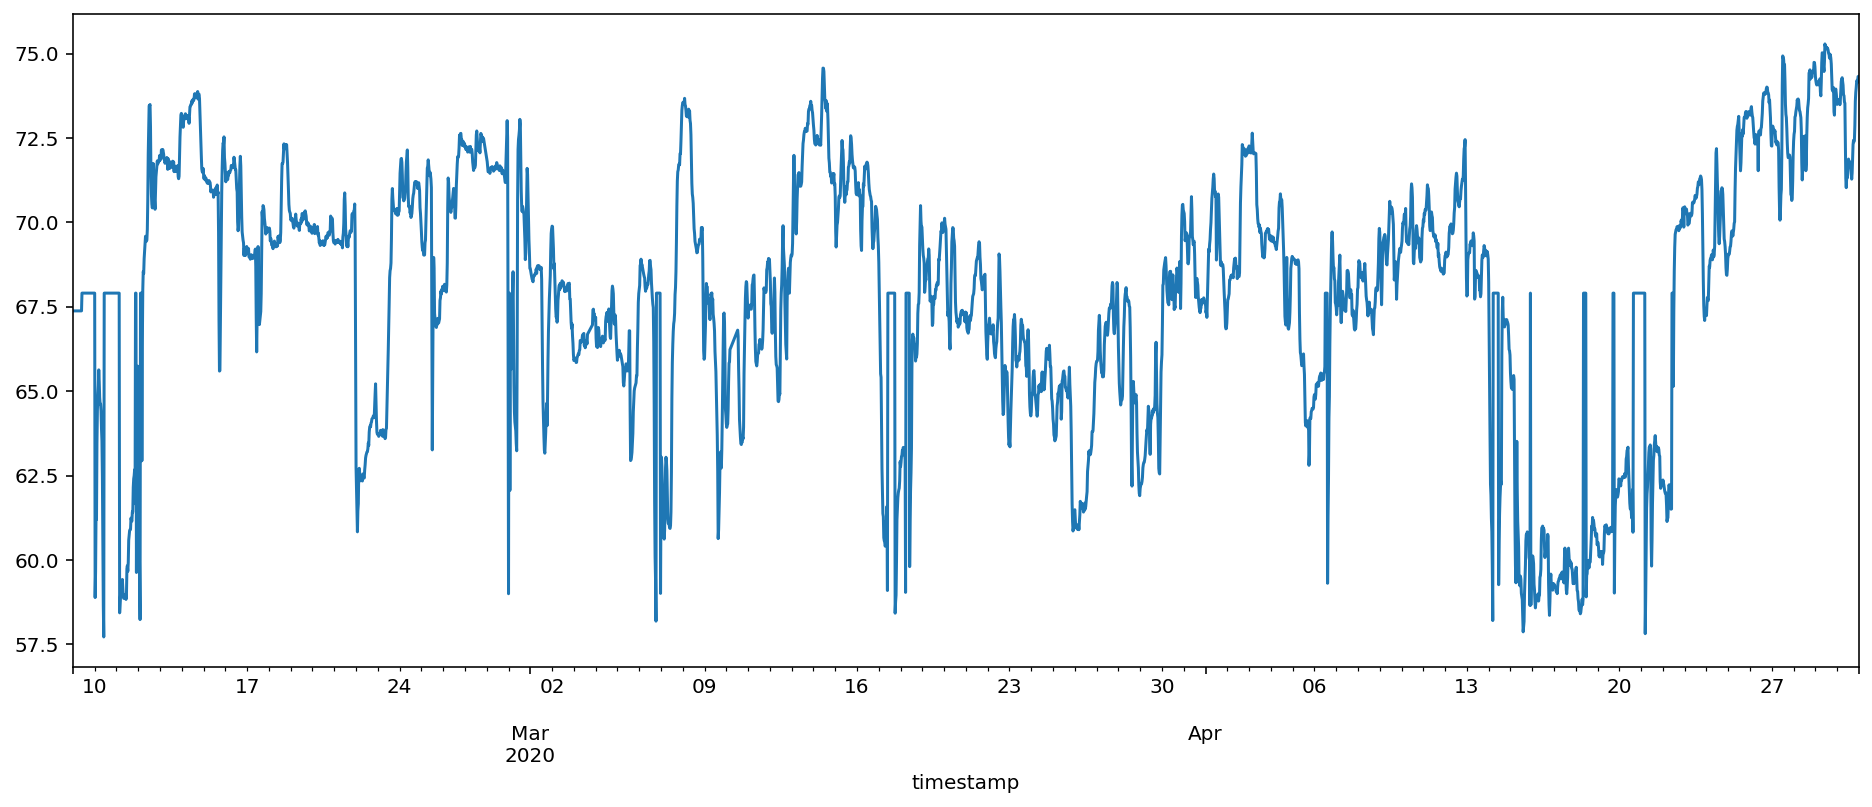

In [461]:
feb['B_rate'].plot(figsize=(16,6))

In [202]:
feb.describe()

A_rate        A_CH4       A_C2H6       A_C3H8     A_iC4H10  \
count  3922.000000  3936.000000  3936.000000  3936.000000  3936.000000   
mean     65.725254     0.179081     4.449284    38.428154    17.262486   
std       4.713467     0.068589     0.651716     1.160164     0.473832   
min      49.435512     0.061567     2.574394    35.521150    15.973183   
25%      63.510679     0.116729     4.104674    37.726960    16.945764   
50%      66.849543     0.175734     4.473880    38.578637    17.237759   
75%      69.175752     0.238762     4.905120    39.178977    17.576721   
max      73.292570     0.342489     6.105778    42.253690    18.731053   

          A_nC4H10     A_iC5H12     A_nC5H12      A_C6H14       B_rate  \
count  3936.000000  3936.000000  3936.000000  3895.000000  3916.000000   
mean     24.109803     4.917252     4.754160     5.940477    67.379870   
std       0.491180     0.493077     0.474240     0.542981     4.555330   
min      22.735853     3.826145     2.901584     4.417589    51.007261   
25%      23.742305     4.556090     4.471269     5.614786    65.154384   
50%      24.074473     4.804981     4.731308     5.786414    68.394339   
75%      24.432184     5.203328     5.003142     6.200201    70.567270   
max      27.302493     6.608027     6.912004     7.982566    75.288904   

            B_C2H6       B_C3H8     B_iC4H10     B_nC4H10  
count  3936.000000  3936.000000  3936.000000  3929.000000  
mean      4.244960    37.617669    16.894329    24.145941  
std       0.700310     1.495211     0.558239     0.551950  
min       2.580707    33.049103    15.199715    22.508542  
25%       3.791527    36.647958    16.508363    23.767450  
50%       4.344120    37.500095    16.899809    24.153927  
75%       4.711138    38.421964    17.236531    24.506374  
max       6.082821    43.178426    18.729426    25.790638

In [418]:
feb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3936 entries, 2020-02-09 00:00:00 to 2020-04-30 23:30:00
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A_rate    3936 non-null   float64
 1   A_CH4     3936 non-null   float64
 2   A_C2H6    3936 non-null   float64
 3   A_C3H8    3936 non-null   float64
 4   A_iC4H10  3936 non-null   float64
 5   A_nC4H10  3936 non-null   float64
 6   A_iC5H12  3936 non-null   float64
 7   A_nC5H12  3936 non-null   float64
 8   A_C6H14   3936 non-null   float64
 9   B_rate    3936 non-null   float64
 10  B_C2H6    3936 non-null   float64
 11  B_C3H8    3936 non-null   float64
 12  B_iC4H10  3936 non-null   float64
 13  B_nC4H10  3936 non-null   float64
dtypes: float64(14)
memory usage: 461.2 KB


In [417]:
for i in range(10):
    feb['A_rate'].interpolate(inplace=True)
    feb['A_CH4'].interpolate(inplace=True)
    feb['A_C2H6'].interpolate(inplace=True)
    feb['A_C3H8'].interpolate(inplace=True)
    feb['A_iC4H10'].interpolate(inplace=True)
    feb['A_nC4H10'].interpolate(inplace=True)
    feb['A_iC5H12'].interpolate(inplace=True)
    feb['A_nC5H12'].interpolate(inplace=True)
    feb['A_C6H14'].interpolate(inplace=True)
    feb['B_rate'].interpolate(inplace=True)
    feb['B_C2H6'].interpolate(inplace=True)
    feb['B_C3H8'].interpolate(inplace=True)
    feb['B_iC4H10'].interpolate(inplace=True)
    feb['B_nC4H10'].interpolate(inplace=True)

<AxesSubplot:xlabel='timestamp'>

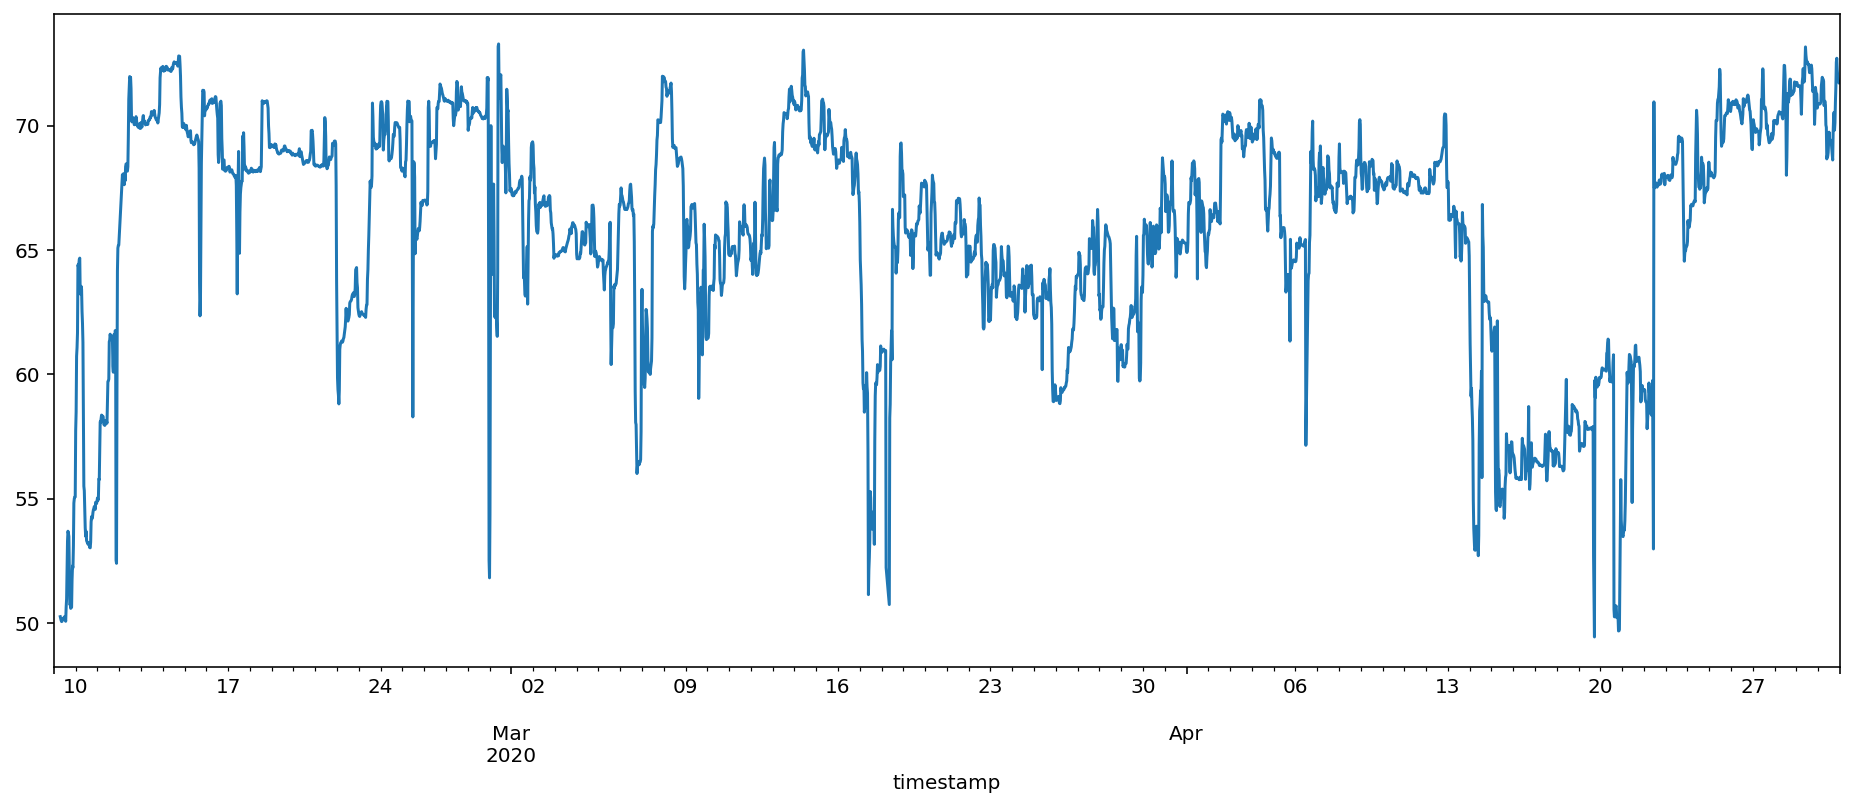

In [171]:
feb['A_rate'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

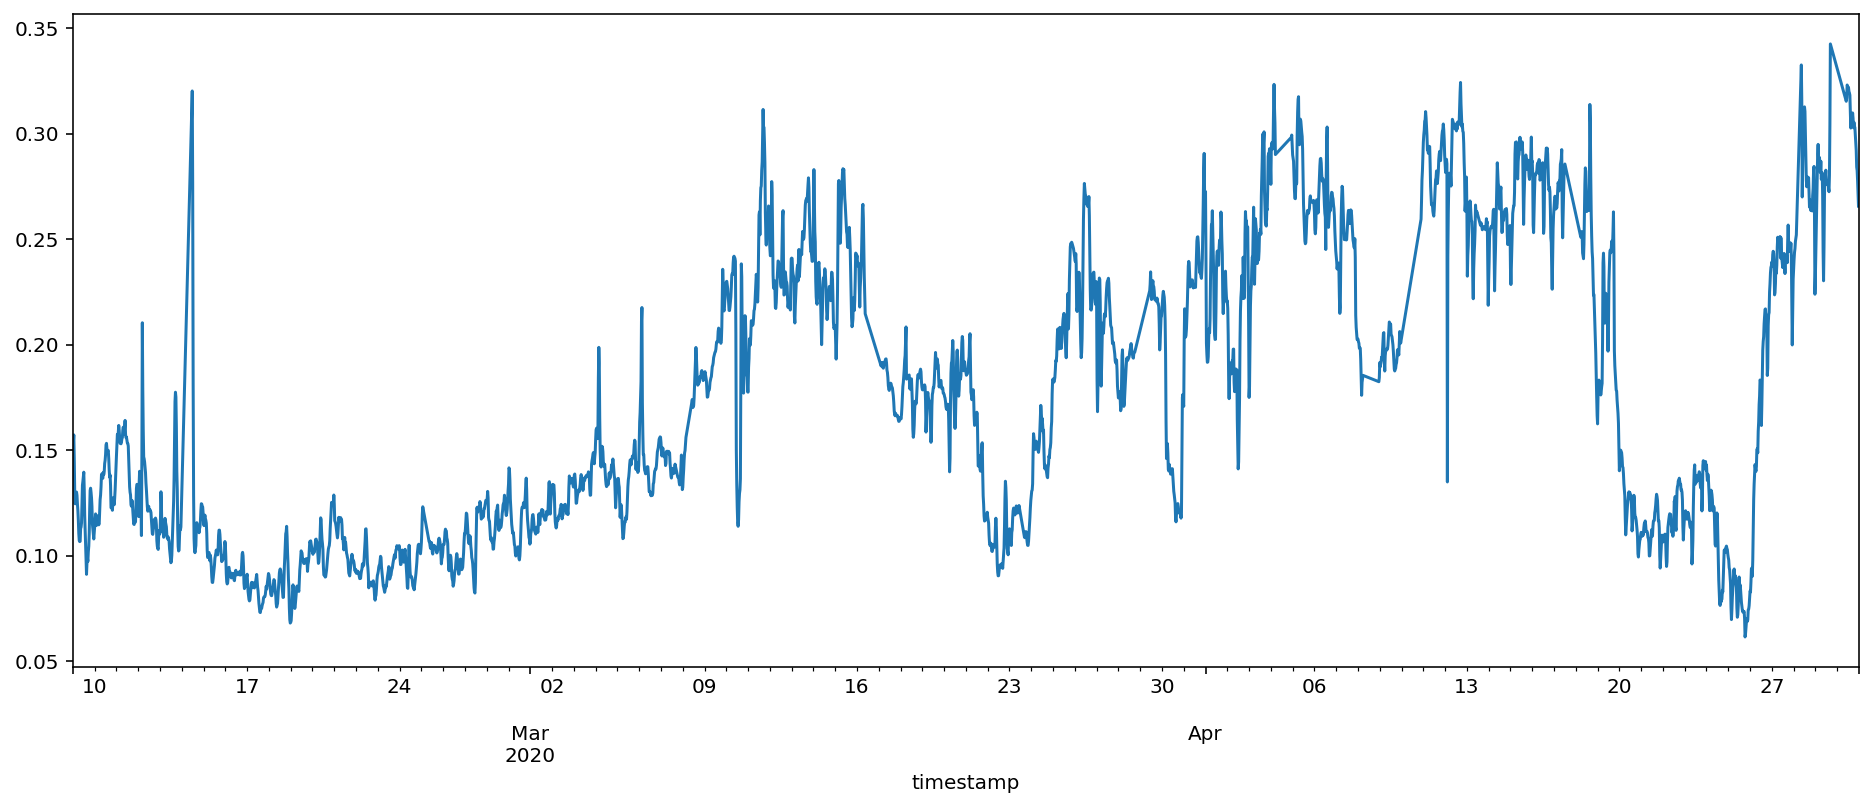

In [172]:
feb['A_CH4'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

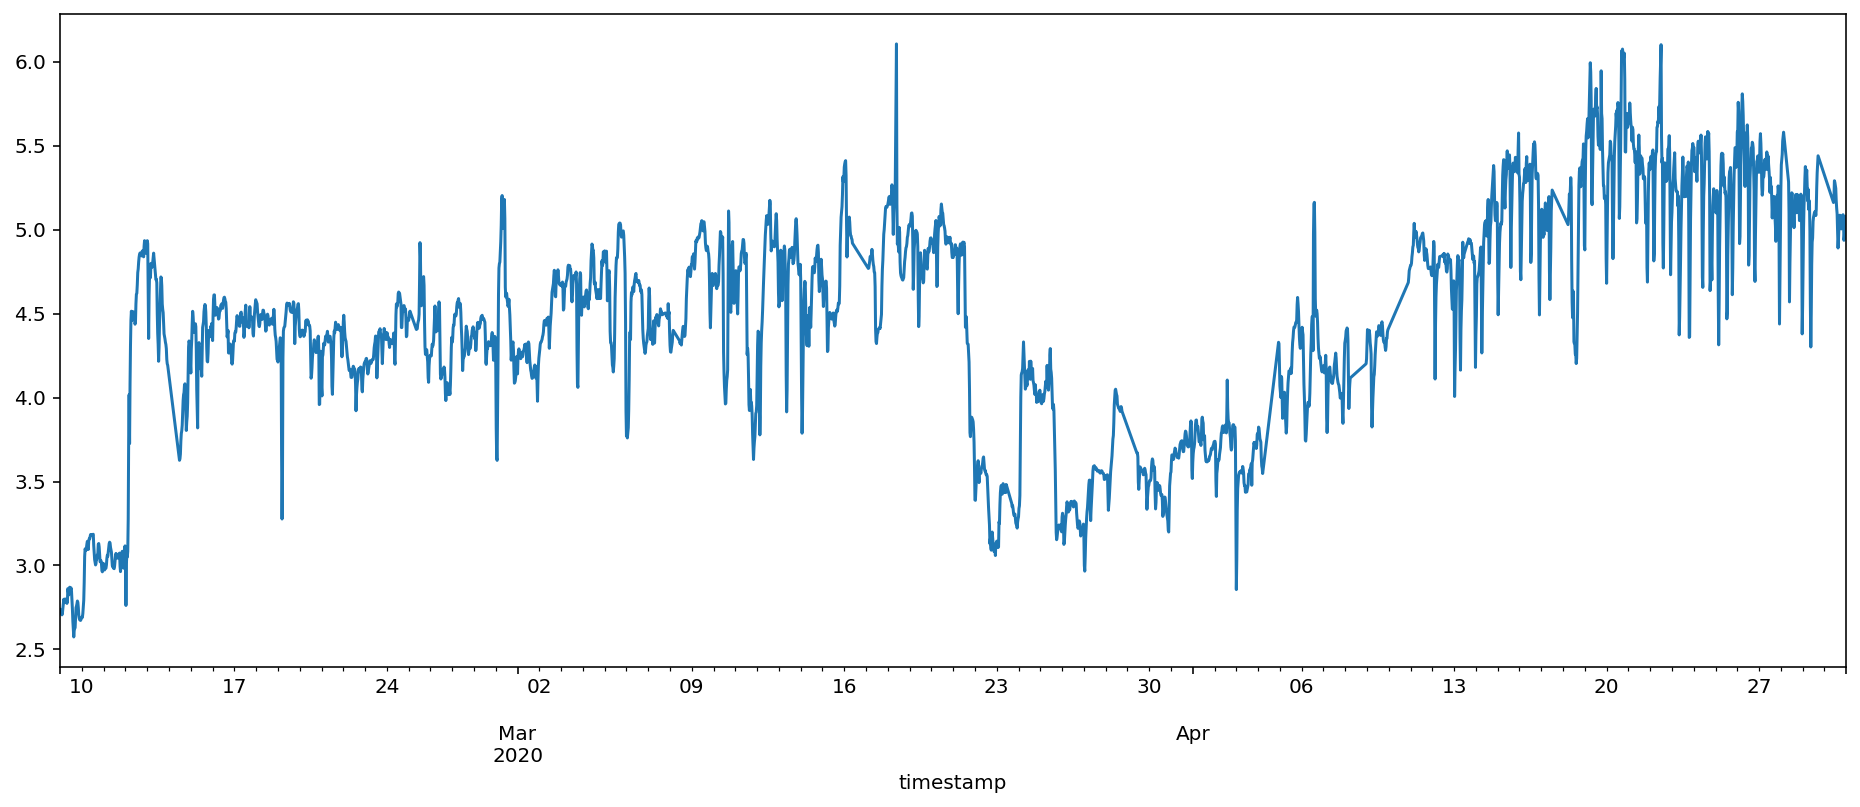

In [180]:
feb['A_C2H6'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

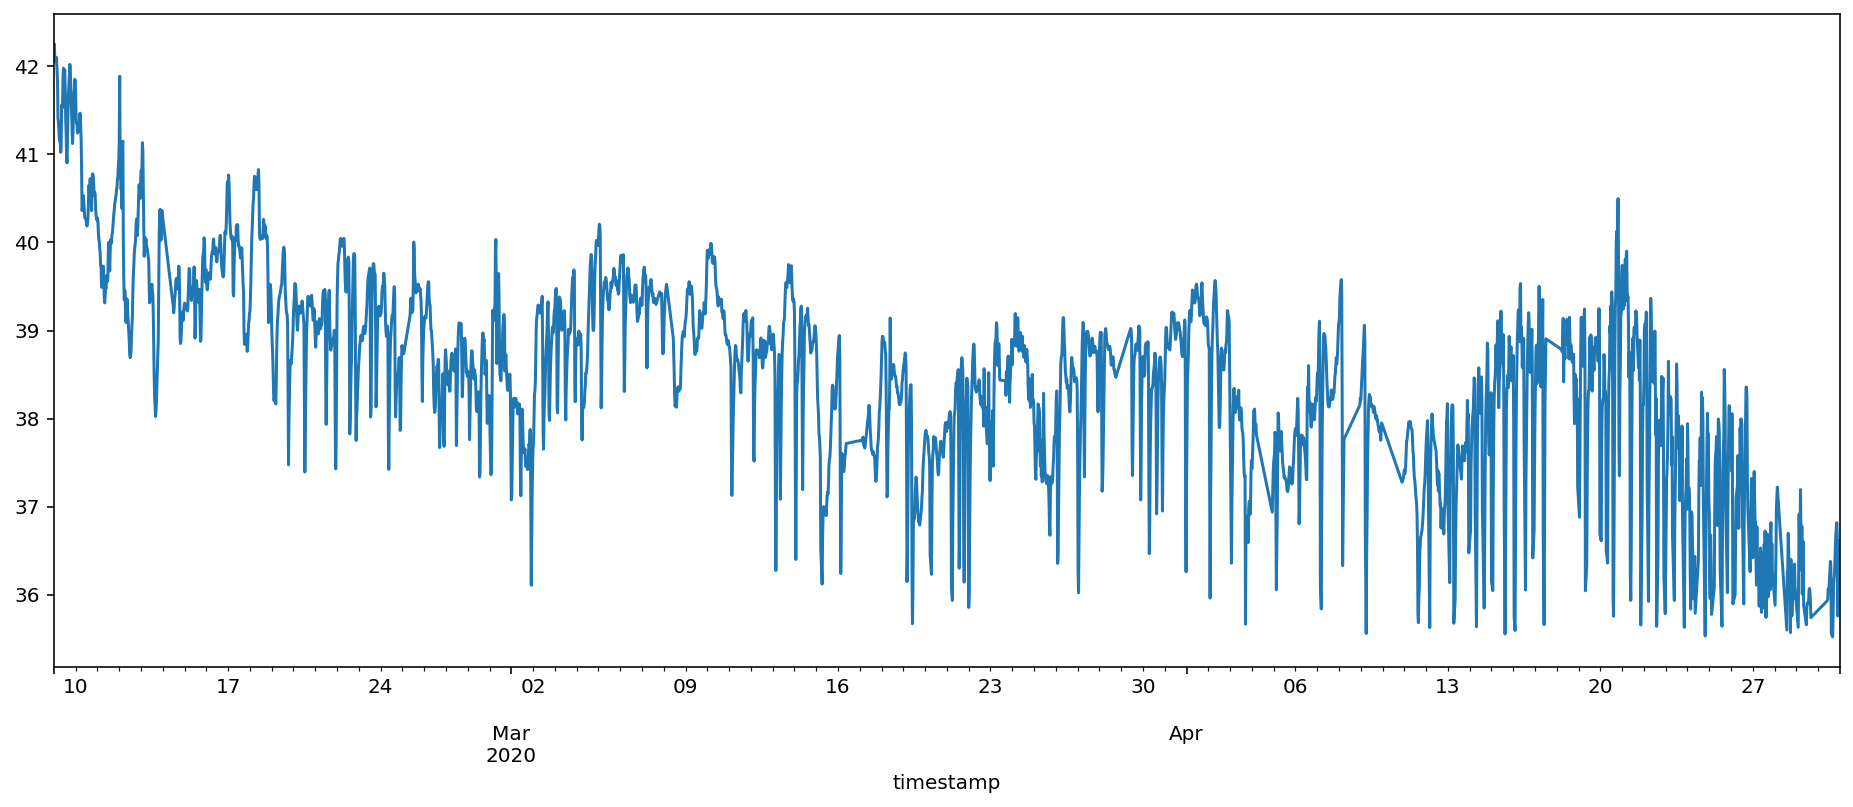

In [181]:
feb['A_C3H8'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

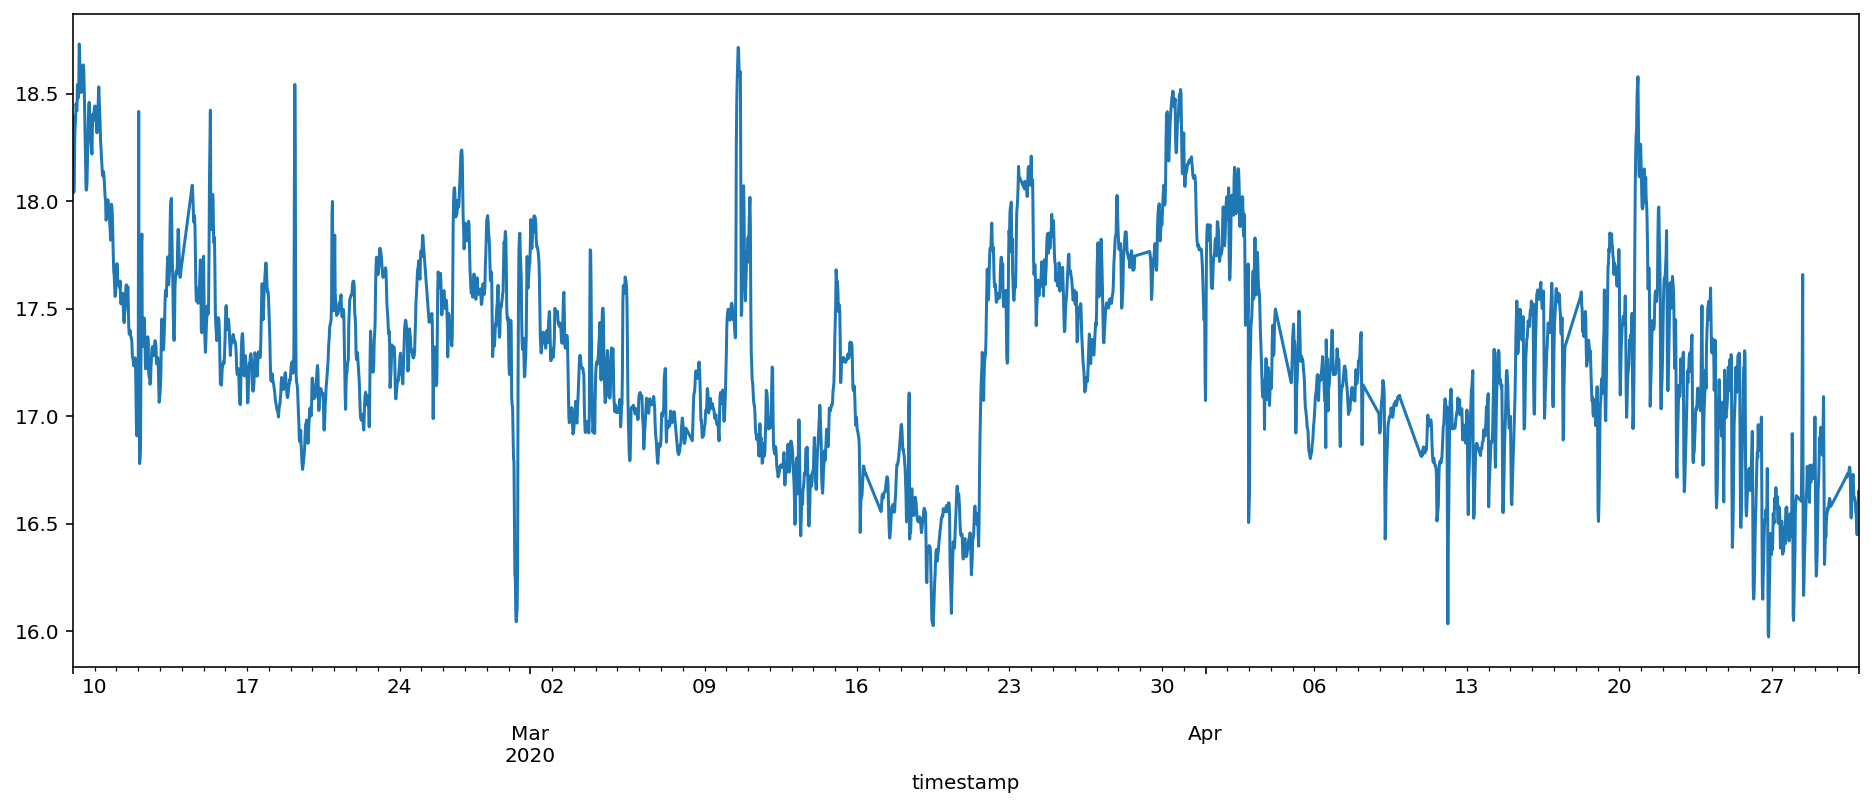

In [182]:
feb['A_iC4H10'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

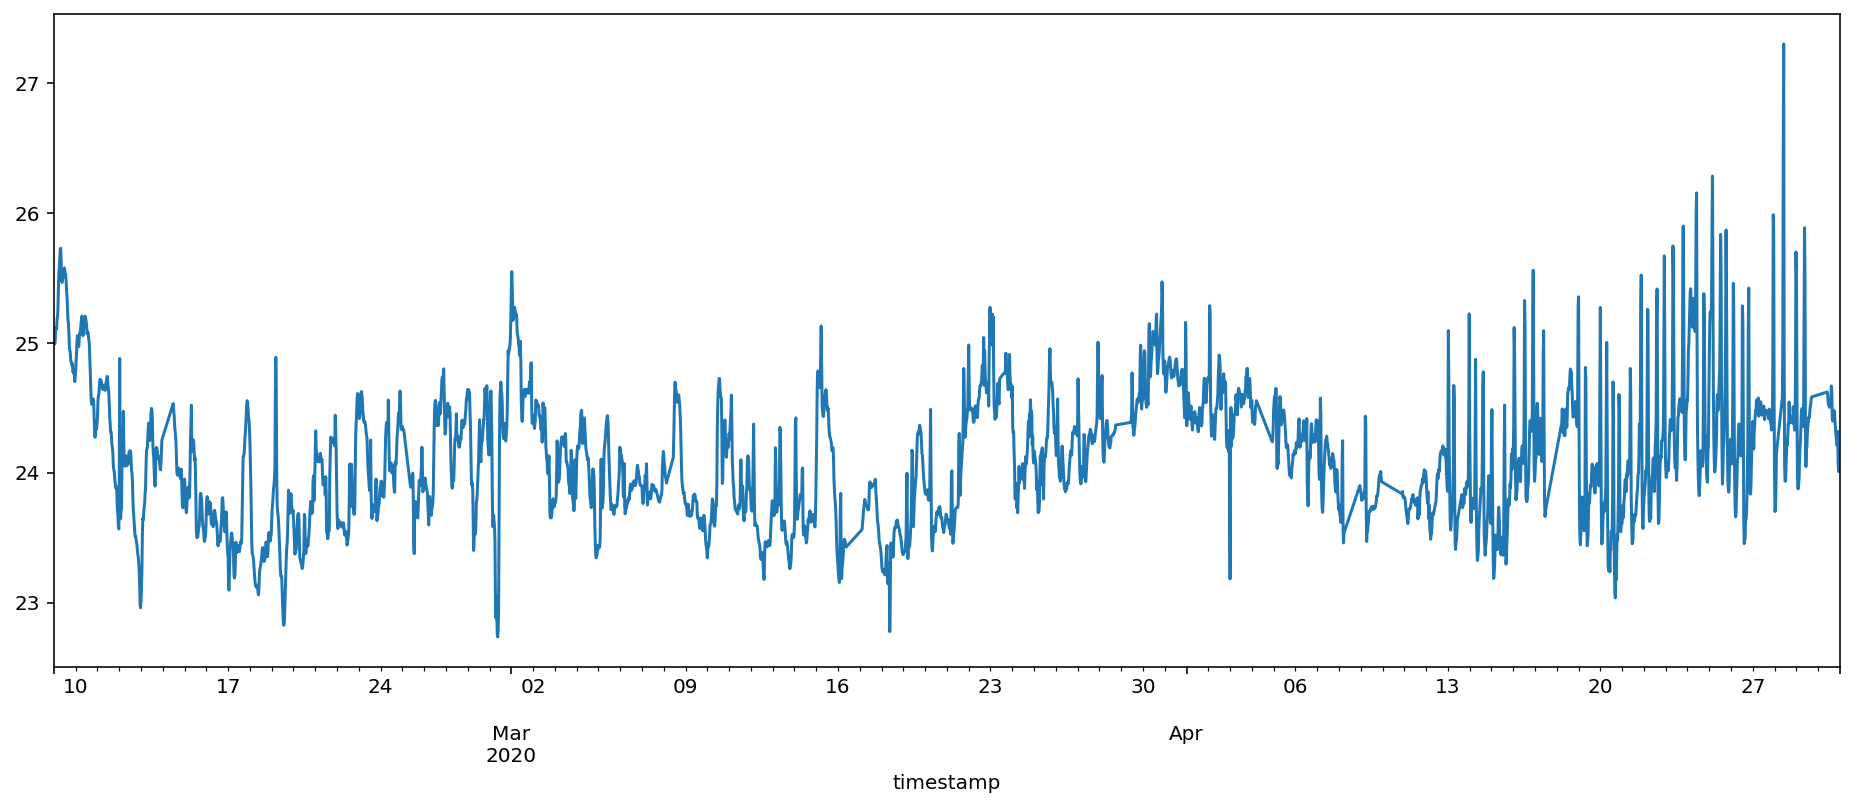

In [183]:
feb['A_nC4H10'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

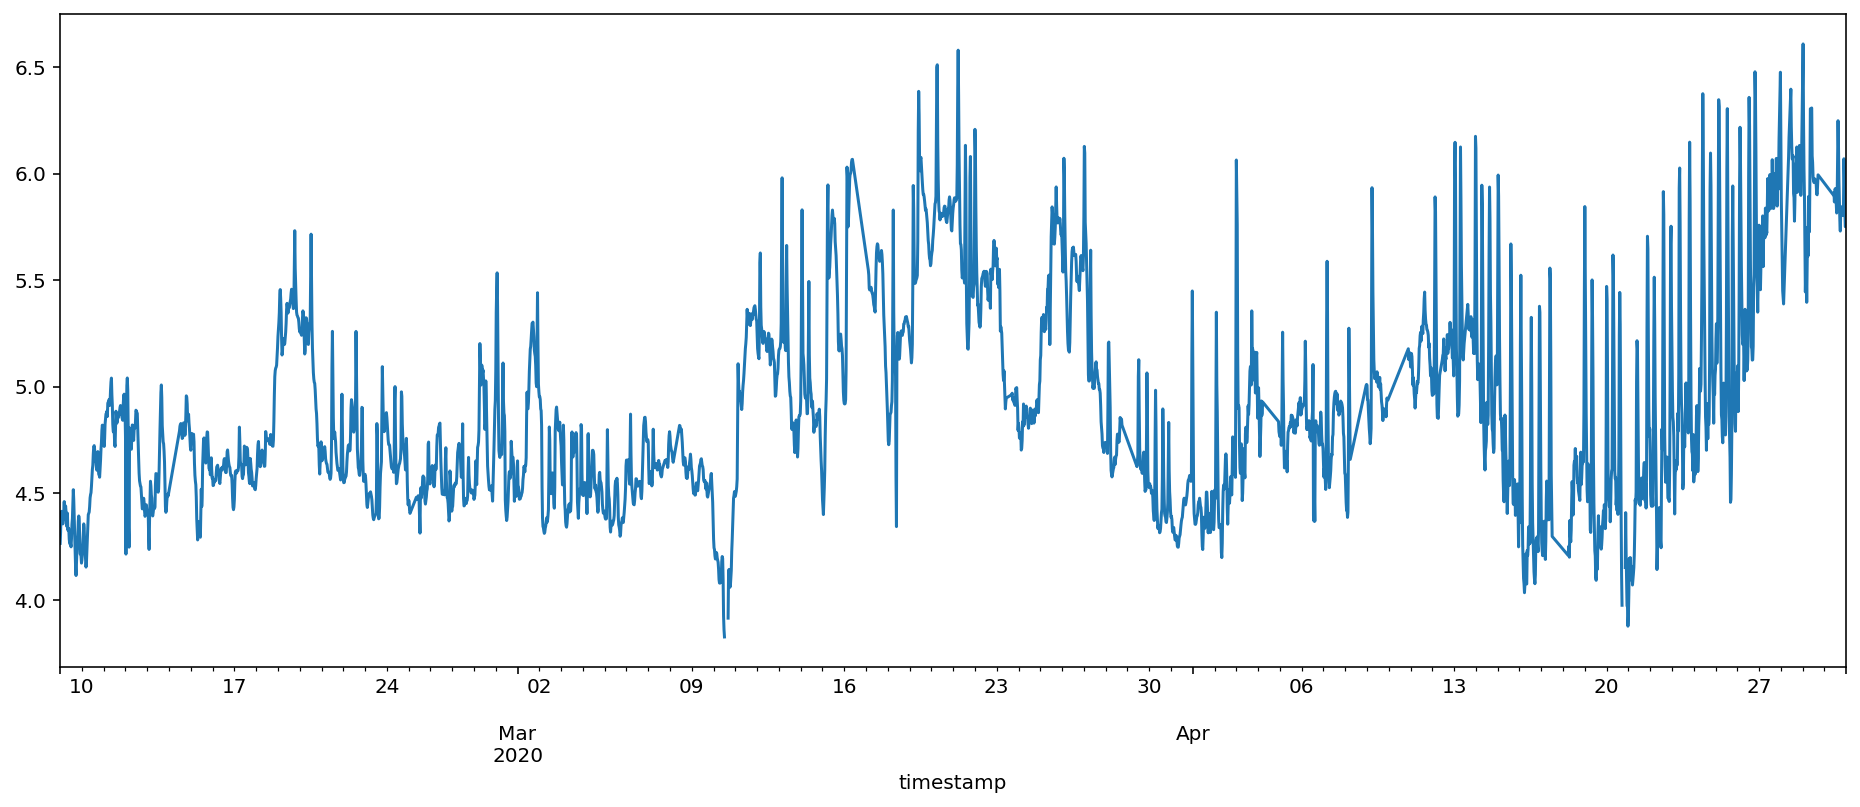

In [186]:
feb['A_iC5H12'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

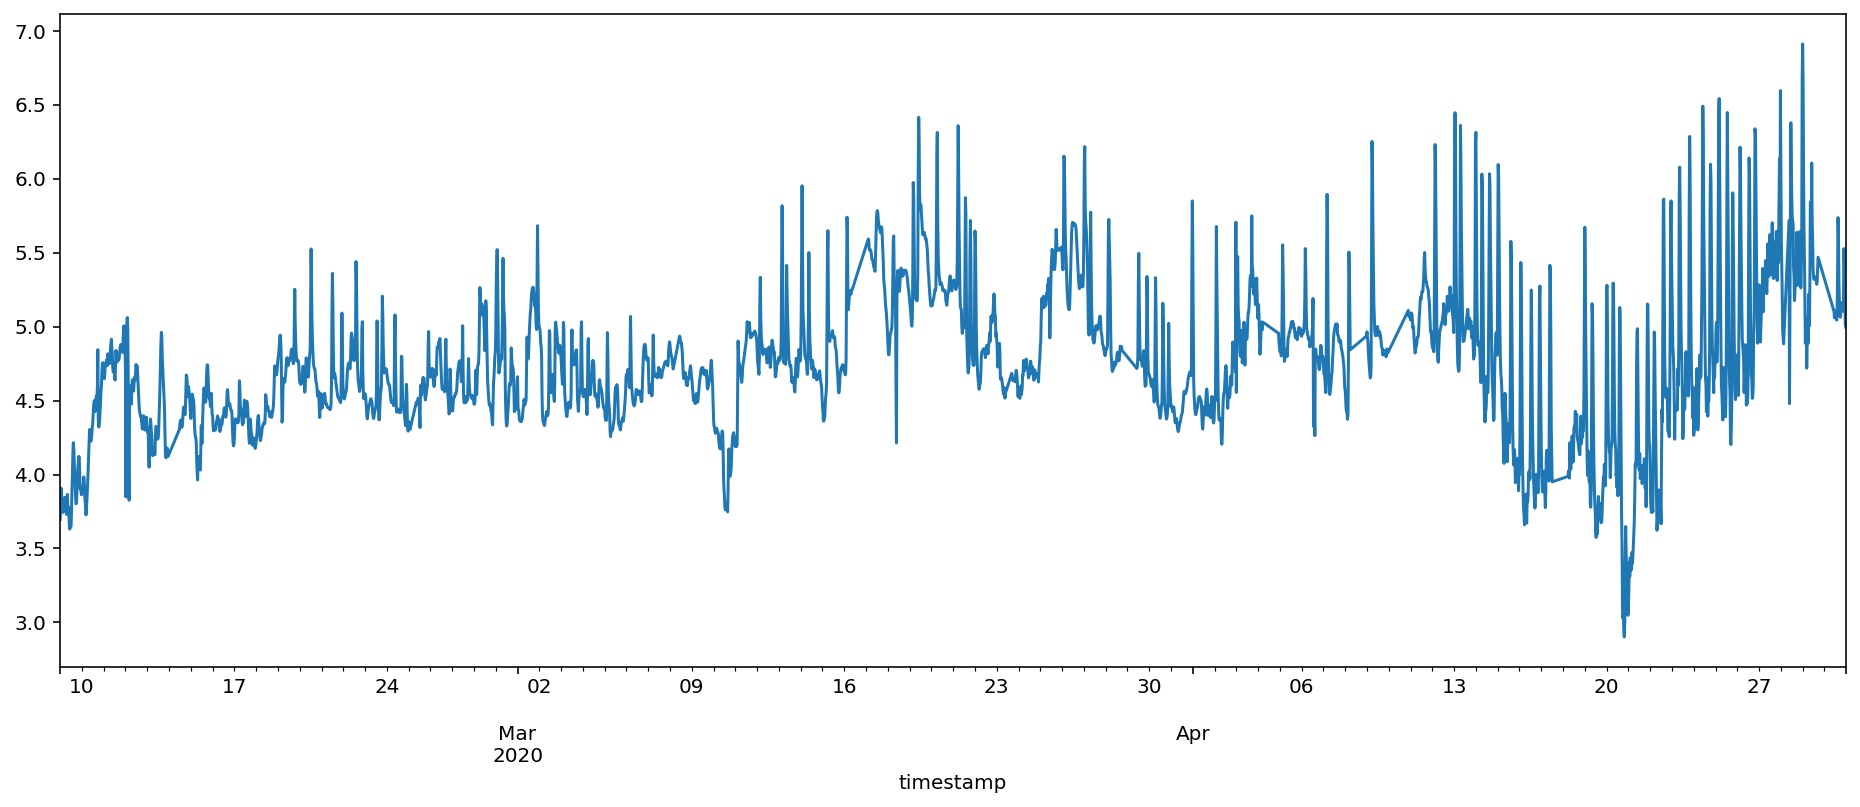

In [187]:
feb['A_nC5H12'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

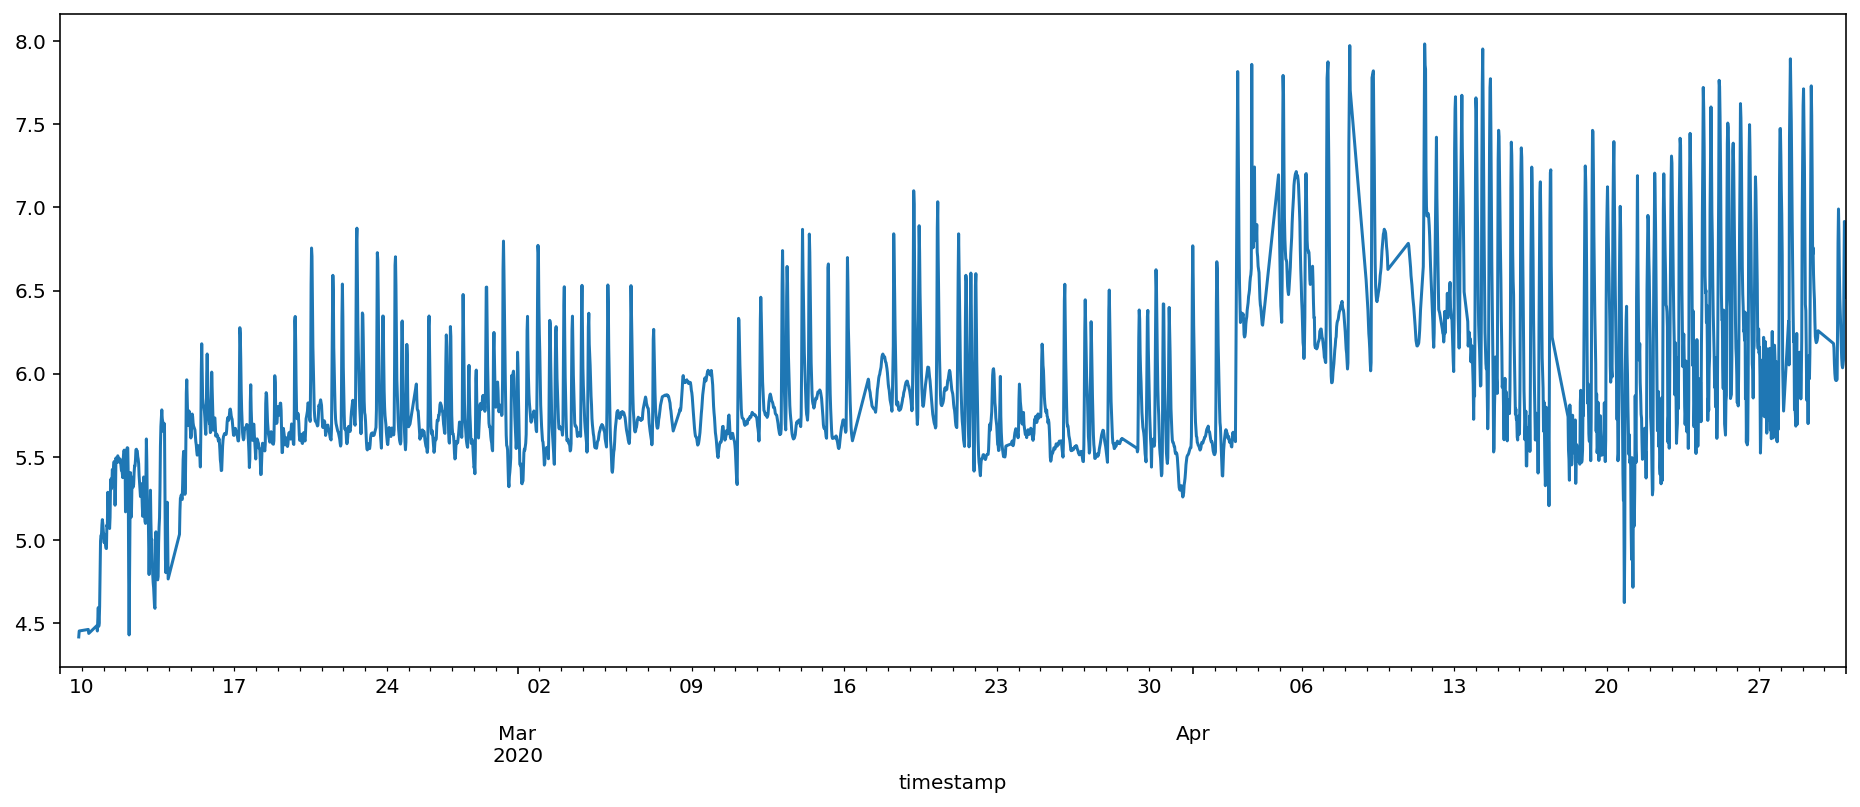

In [188]:
feb['A_C6H14'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

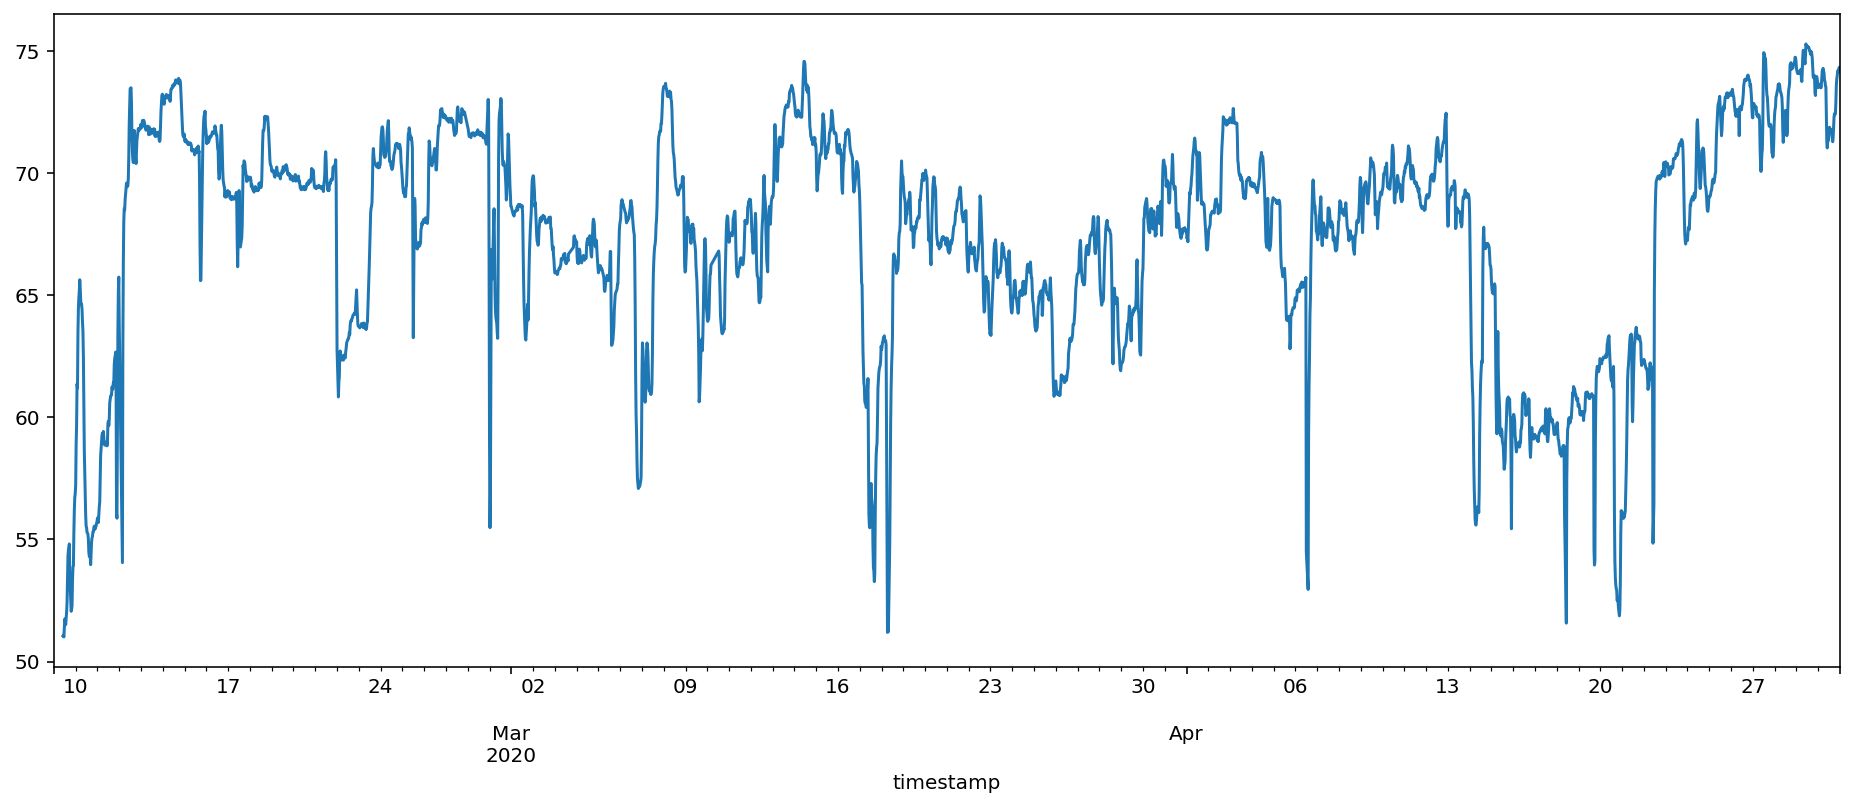

In [189]:
feb['B_rate'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

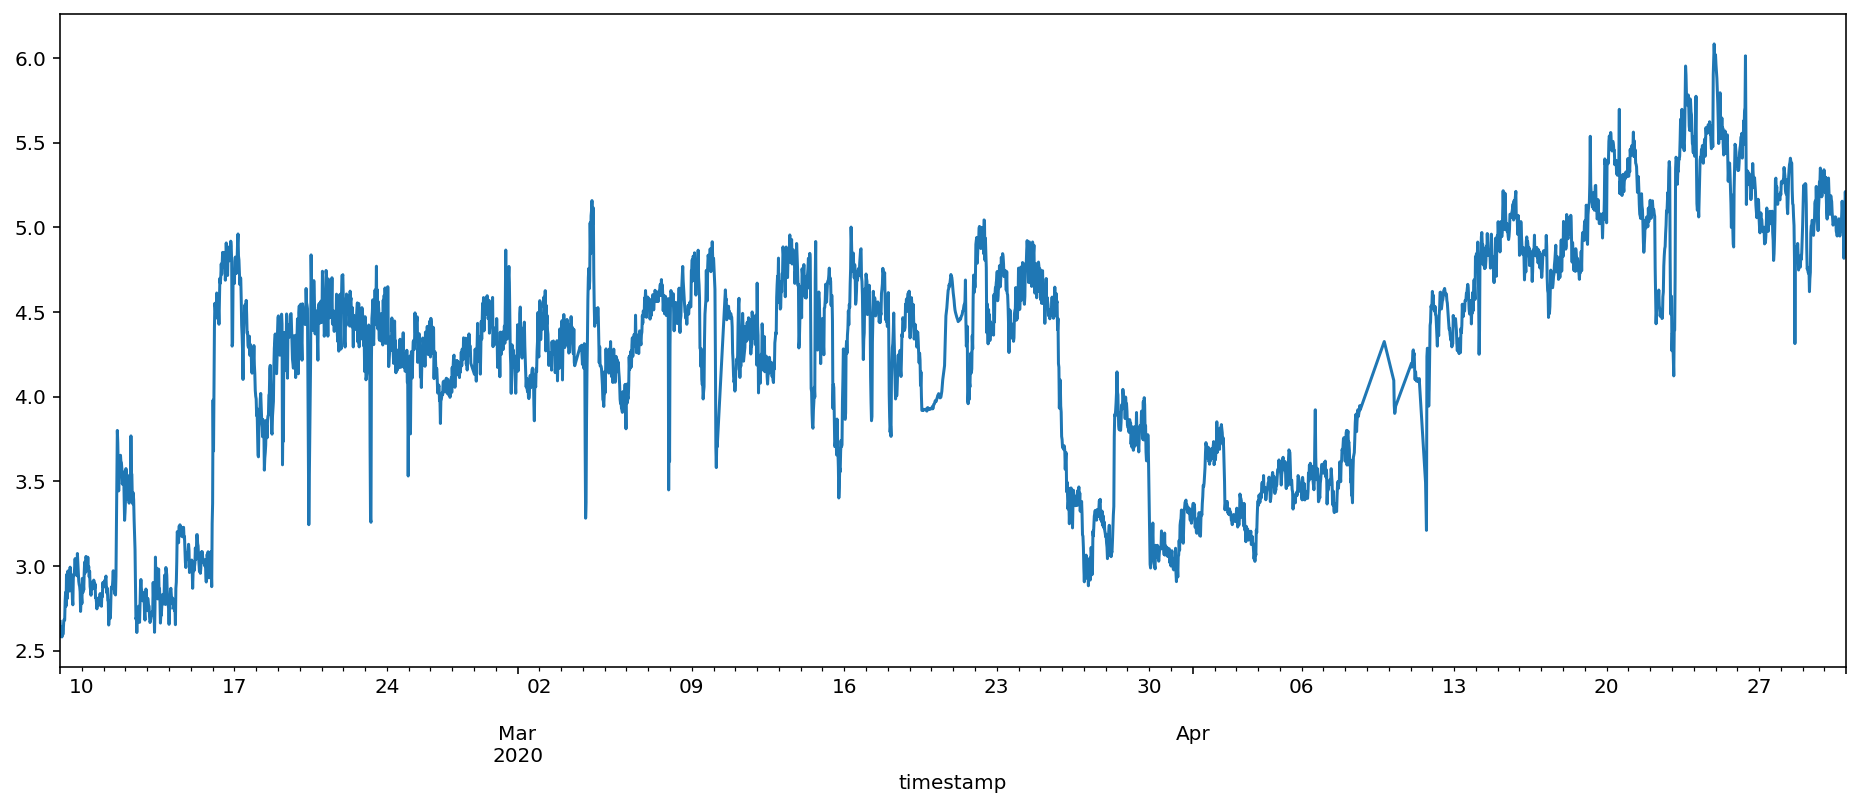

In [190]:
feb['B_C2H6'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

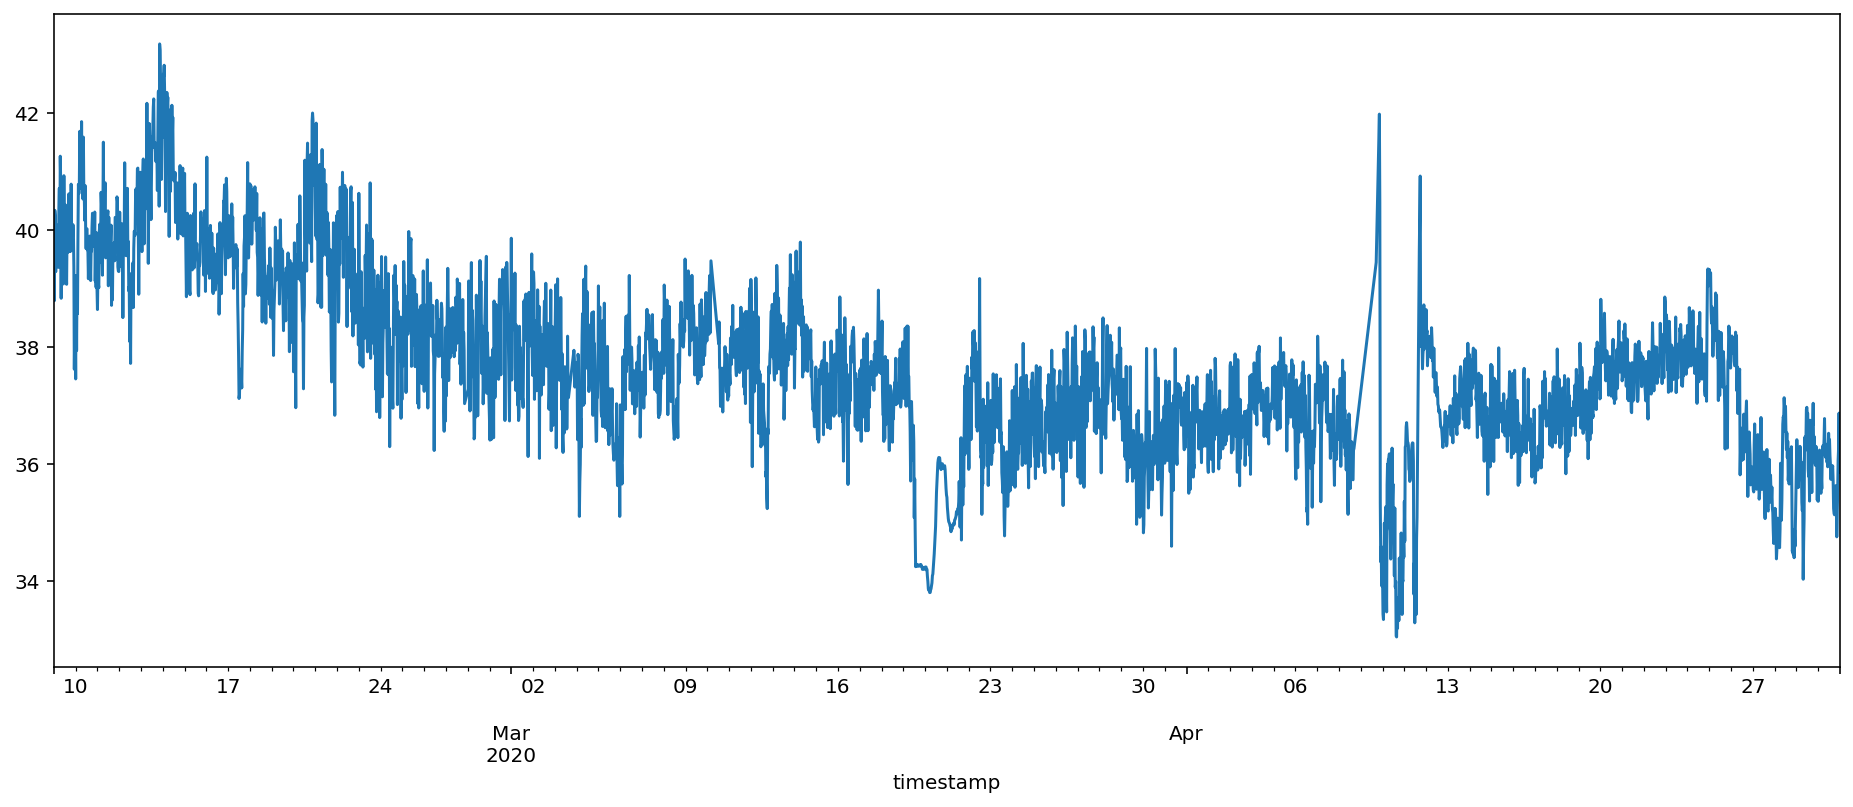

In [191]:
feb['B_C3H8'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

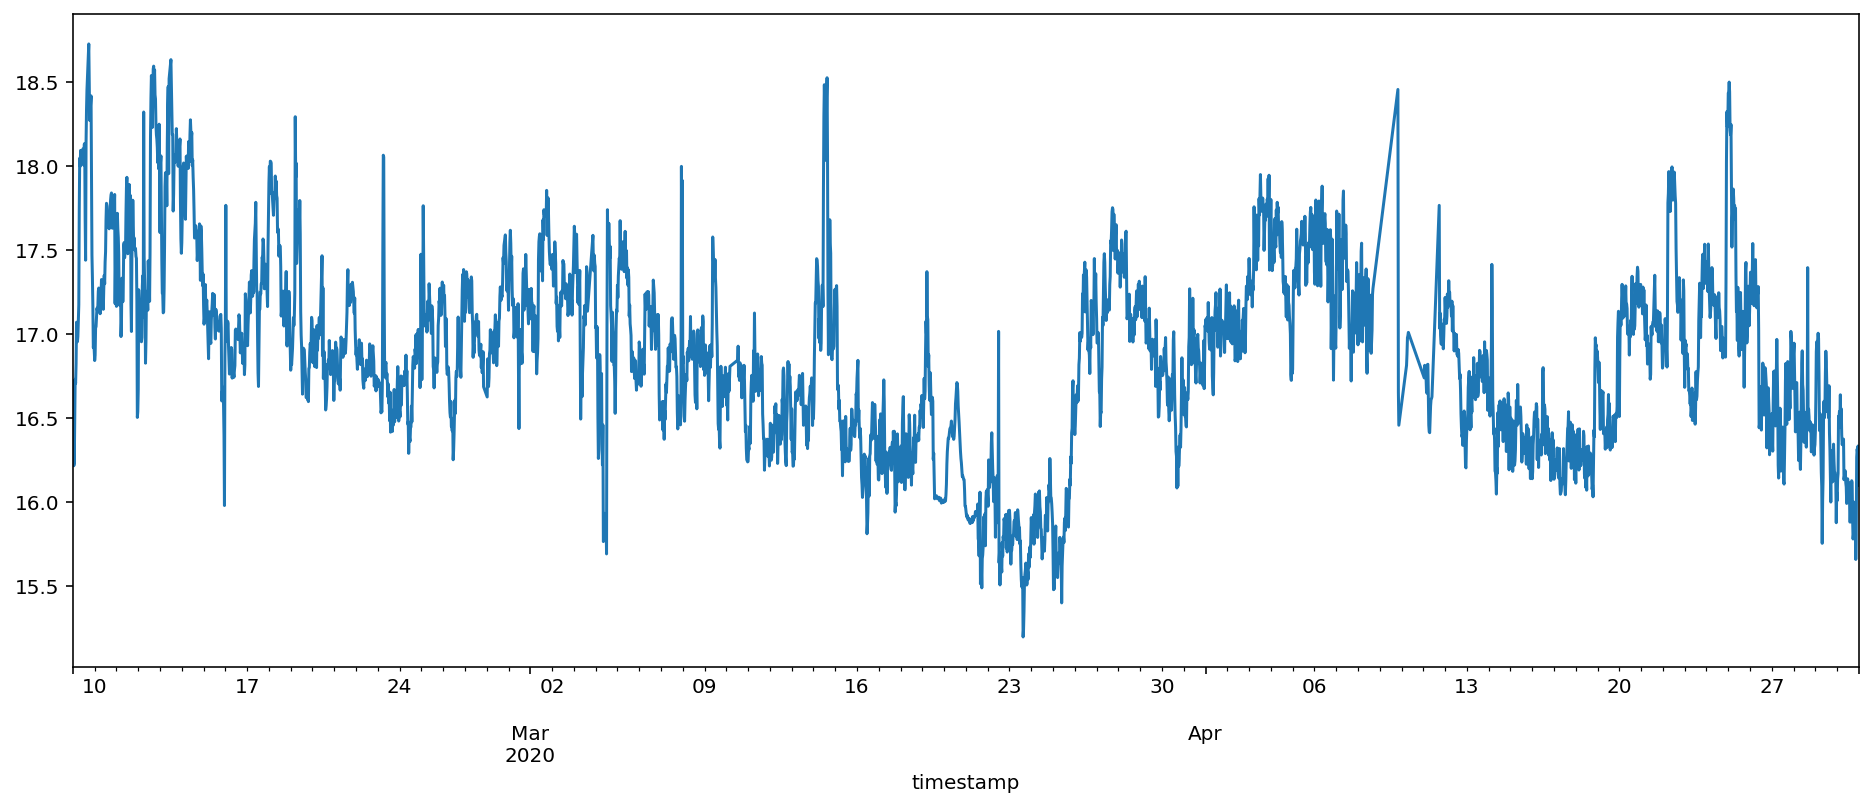

In [192]:
feb['B_iC4H10'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

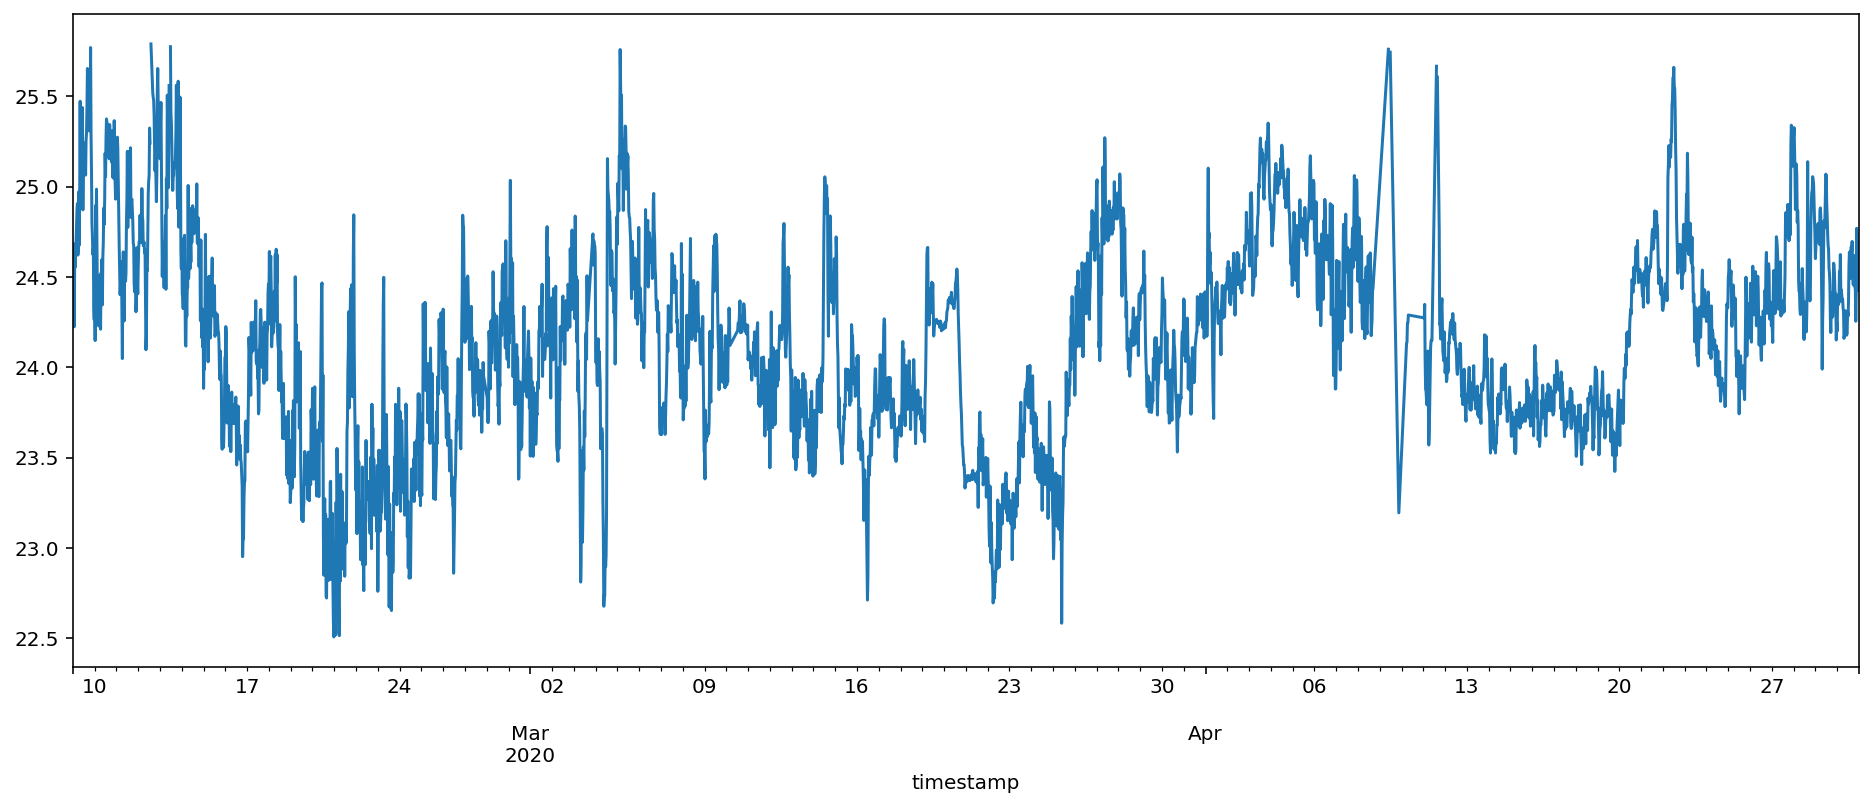

In [203]:
feb['B_nC4H10'].plot(figsize=(16, 6))

In [414]:
feb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3936 entries, 2020-02-09 00:00:00 to 2020-04-30 23:30:00
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A_rate    3936 non-null   float64
 1   A_CH4     3936 non-null   float64
 2   A_C2H6    3936 non-null   float64
 3   A_C3H8    3936 non-null   float64
 4   A_iC4H10  3936 non-null   float64
 5   A_nC4H10  3936 non-null   float64
 6   A_iC5H12  3936 non-null   float64
 7   A_nC5H12  3848 non-null   float64
 8   A_C6H14   3936 non-null   float64
 9   B_rate    3936 non-null   float64
 10  B_C2H6    3936 non-null   float64
 11  B_C3H8    3936 non-null   float64
 12  B_iC4H10  3936 non-null   float64
 13  B_nC4H10  3936 non-null   float64
dtypes: float64(14)
memory usage: 461.2 KB


In [206]:
feb['A_CH4'].fillna(feb['A_CH4'].median(), inplace=True)
feb['A_C2H6'].fillna(feb['A_C2H6'].median(), inplace=True)
feb['A_C3H8'].fillna(feb['A_C3H8'].median(), inplace=True)
feb['A_iC4H10'].fillna(feb['A_iC4H10'].median(), inplace=True)
feb['A_nC4H10'].fillna(feb['A_nC4H10'].median(), inplace=True)
feb['A_nC5H12'].fillna(feb['A_nC5H12'].median(), inplace=True)
feb['A_iC5H12'].fillna(feb['A_iC5H12'].median(), inplace=True)
feb['A_C6H14'].fillna(feb['A_C6H14'].median(), inplace=True)
feb['B_C2H6'].fillna(feb['B_C2H6'].median(), inplace=True)
feb['B_C3H8'].fillna(feb['B_C3H8'].median(), inplace=True)
feb['B_iC4H10'].fillna(feb['B_iC4H10'].median(), inplace=True)
feb['B_nC4H10'].fillna(feb['B_nC4H10'].median(), inplace=True)
feb['A_rate'].fillna(feb['A_rate'].mean(), inplace=True)
feb['B_rate'].fillna(feb['B_rate'].mean(), inplace=True)


A_rate     A_CH4    A_C2H6     A_C3H8   A_iC4H10  \
timestamp                                                                  
2020-05-01 00:00:00  71.428342  0.267832  5.135159  36.816480  16.632260   
2020-05-01 00:30:00  70.925118  0.268464  5.149646  36.869023  16.651870   
2020-05-01 01:00:00  70.991719  0.270641  5.154615  37.074965  16.710967   
2020-05-01 01:30:00  70.972406  0.275241  5.230661  37.384180  16.683337   
2020-05-01 02:00:00  70.980078  0.275062  5.241437  37.448587  16.663863   
...                        ...       ...       ...        ...        ...   
2020-07-22 21:30:00  72.600912  0.120985  4.328092  40.875930  17.741460   
2020-07-22 22:00:00  72.107049  0.110734  4.013567  38.871418  17.449352   
2020-07-22 22:30:00  71.805799  0.111535  4.041506  39.794323  17.635380   
2020-07-22 23:00:00  72.112046  0.119362  4.131432  40.461503  17.758833   
2020-07-22 23:30:00  72.941085  0.122393  4.207615  40.957330  17.772225   

                      A_nC4H10  A_iC5H12  A_nC5H12   A_C6H14     B_rate  
timestamp                                                                
2020-05-01 00:00:00  24.062587  5.696004  4.939430  6.395286  74.273009  
2020-05-01 00:30:00  24.069800  5.676384  4.911872  6.346957  74.061833  
2020-05-01 01:00:00  24.106152  5.574873  4.808516  6.242636  73.856268  
2020-05-01 01:30:00  24.021993  5.514843  4.730887  6.101647  73.750744  
2020-05-01 02:00:00  24.003237  5.524898  4.728882  6.057119  73.698447  
...                        ...       ...       ...       ...        ...  
2020-07-22 21:30:00  24.098520  4.469224  3.619095  4.686205  75.486026  
2020-07-22 22:00:00  24.049532  4.770699  3.988215  6.689777  75.370451  
2020-07-22 22:30:00  24.169473  4.613603  3.790651  5.785216  74.985878  
2020-07-22 23:00:00  24.211013  4.504242  3.657459  5.094626  74.766867  
2020-07-22 23:30:00  24.088445  4.387957  3.536302  4.863965  74.804667  

[3984 rows x 10 columns]

In [468]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3984 entries, 2020-05-01 00:00:00 to 2020-07-22 23:30:00
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A_rate    2816 non-null   float64
 1   A_CH4     3517 non-null   float64
 2   A_C2H6    3477 non-null   float64
 3   A_C3H8    3465 non-null   float64
 4   A_iC4H10  3480 non-null   float64
 5   A_nC4H10  3490 non-null   float64
 6   A_iC5H12  3469 non-null   float64
 7   A_nC5H12  3333 non-null   float64
 8   A_C6H14   3508 non-null   float64
 9   B_rate    3857 non-null   float64
dtypes: float64(10)
memory usage: 342.4 KB


In [469]:
test.describe()

A_rate        A_CH4       A_C2H6       A_C3H8     A_iC4H10  \
count  2816.000000  3517.000000  3477.000000  3465.000000  3480.000000   
mean     70.051770     0.162330     4.493259    39.155483    17.380198   
std       1.909951     0.051055     0.385313     1.361693     0.670207   
min      61.439079     0.084754     3.603494    35.438803    15.828277   
25%      69.194661     0.126594     4.249902    38.425970    16.857121   
50%      70.159151     0.147864     4.471288    39.069757    17.273368   
75%      71.297572     0.173949     4.735459    40.298340    18.060046   
max      74.346769     0.348252     5.474893    41.988437    18.595153   

          A_nC4H10     A_iC5H12     A_nC5H12      A_C6H14       B_rate  
count  3490.000000  3469.000000  3333.000000  3508.000000  3857.000000  
mean     23.919636     4.869041     4.488222     5.520780    72.691690  
std       0.423179     0.568254     0.564801     0.947239     1.475518  
min      23.006020     3.931211     3.601349     0.000000    68.132754  
25%      23.584649     4.387161     3.881947     4.742783    71.759801  
50%      23.901281     4.779152     4.605488     5.940244    72.659521  
75%      24.258819     5.192084     4.927289     6.124897    73.841687  
max      25.102183     6.398289     5.899739     8.196776    75.973843

In [466]:
test.loc[test['A_rate'] < 61.4, 'A_rate'] = np.NaN
test.loc[test['A_CH4'] > 0.35, 'A_CH4'] = np.NaN
test.loc[test['A_CH4'] < 0.08, 'A_CH4'] = np.NaN
test.loc[test['A_C2H6'] < 3.6025, 'A_C2H6'] = np.NaN
test.loc[test['A_C2H6'] > 5.5, 'A_C2H6'] = np.NaN
test.loc[test['A_C3H8'] > 42, 'A_C3H8'] = np.NaN
test.loc[test['A_C3H8'] < 35.4, 'A_C3H8'] = np.NaN
test.loc[test['A_iC4H10'] > 18.6, 'A_iC4H10'] = np.NaN
test.loc[test['A_iC4H10'] < 15.8, 'A_iC4H10'] = np.NaN
test.loc[test['A_nC4H10'] > 25.15, 'A_nC4H10'] = np.NaN
test.loc[test['A_nC4H10'] < 23, 'A_nC4H10'] = np.NaN
test.loc[test['A_iC5H12'] > 6.4, 'A_iC5H12'] = np.NaN
test.loc[test['A_iC5H12'] < 3.93, 'A_iC5H12'] = np.NaN
test.loc[test['A_nC5H12'] > 5.9, 'A_nC5H12'] = np.NaN
test.loc[test['A_nC5H12'] < 3.6, 'A_nC5H12'] = np.NaN
test.loc[test['A_C6H14'] > 8.3, 'A_C6H14'] = np.NaN
test.loc[test['B_rate'] > 78, 'B_rate'] = np.NaN
test.loc[test['B_rate'] < 68, 'B_rate'] = np.NaN


## По очереди накладывал графики колонок 

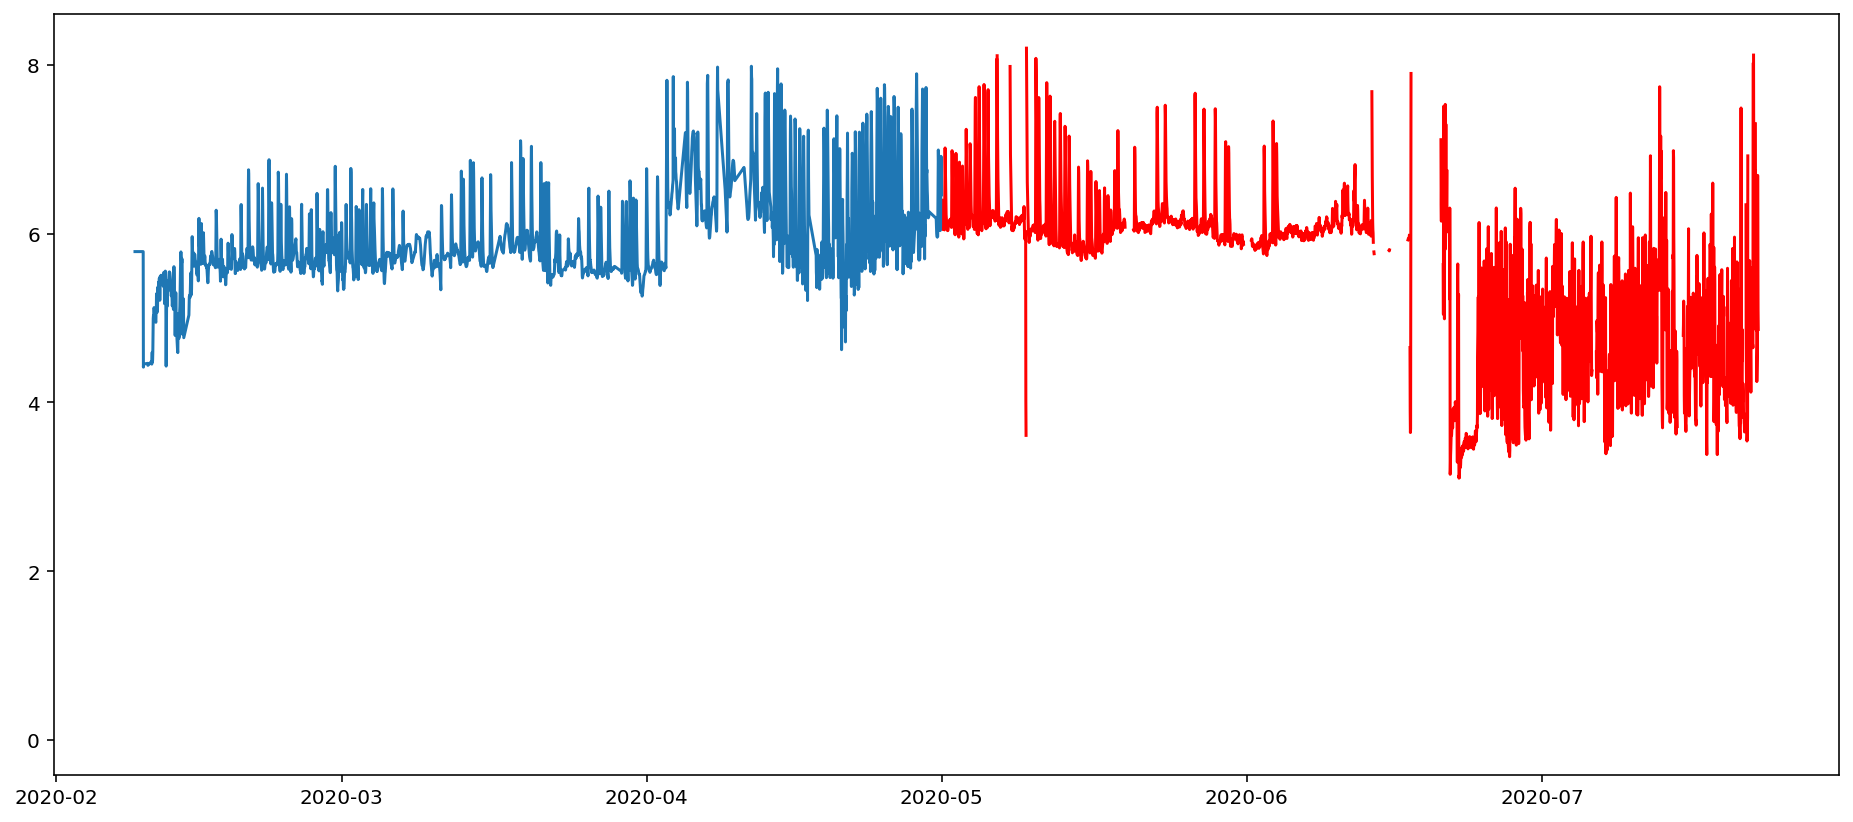

In [467]:
#test['A_rate'].plot(figsize=(16, 6))
plt.figure(figsize=(16, 7))
plt.plot(test['A_C6H14'], color='r', label="test",)
#plt.title("SARIMA model\n Mean absolute error {} users".format(round(mean_absolute_error(data.dropna().B_C2H6, data.dropna().arima_model))))
plt.plot(feb['A_C6H14'], label="train",)

<AxesSubplot:xlabel='timestamp'>

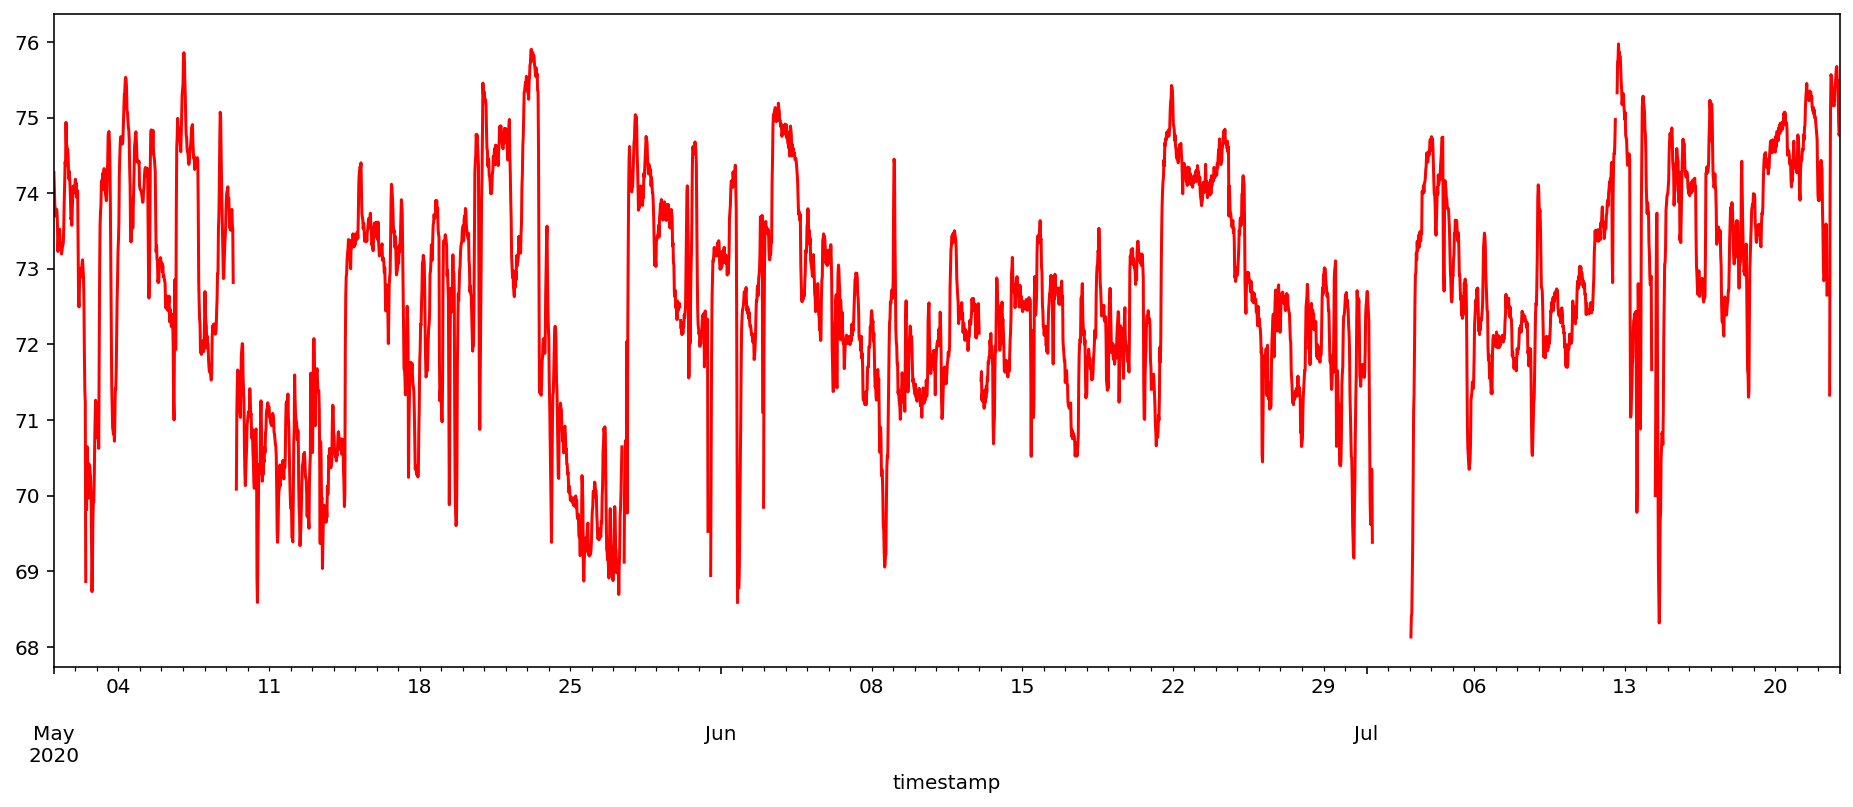

In [400]:
test['B_rate'].plot(figsize=(16, 6), color='r')

<AxesSubplot:xlabel='timestamp'>

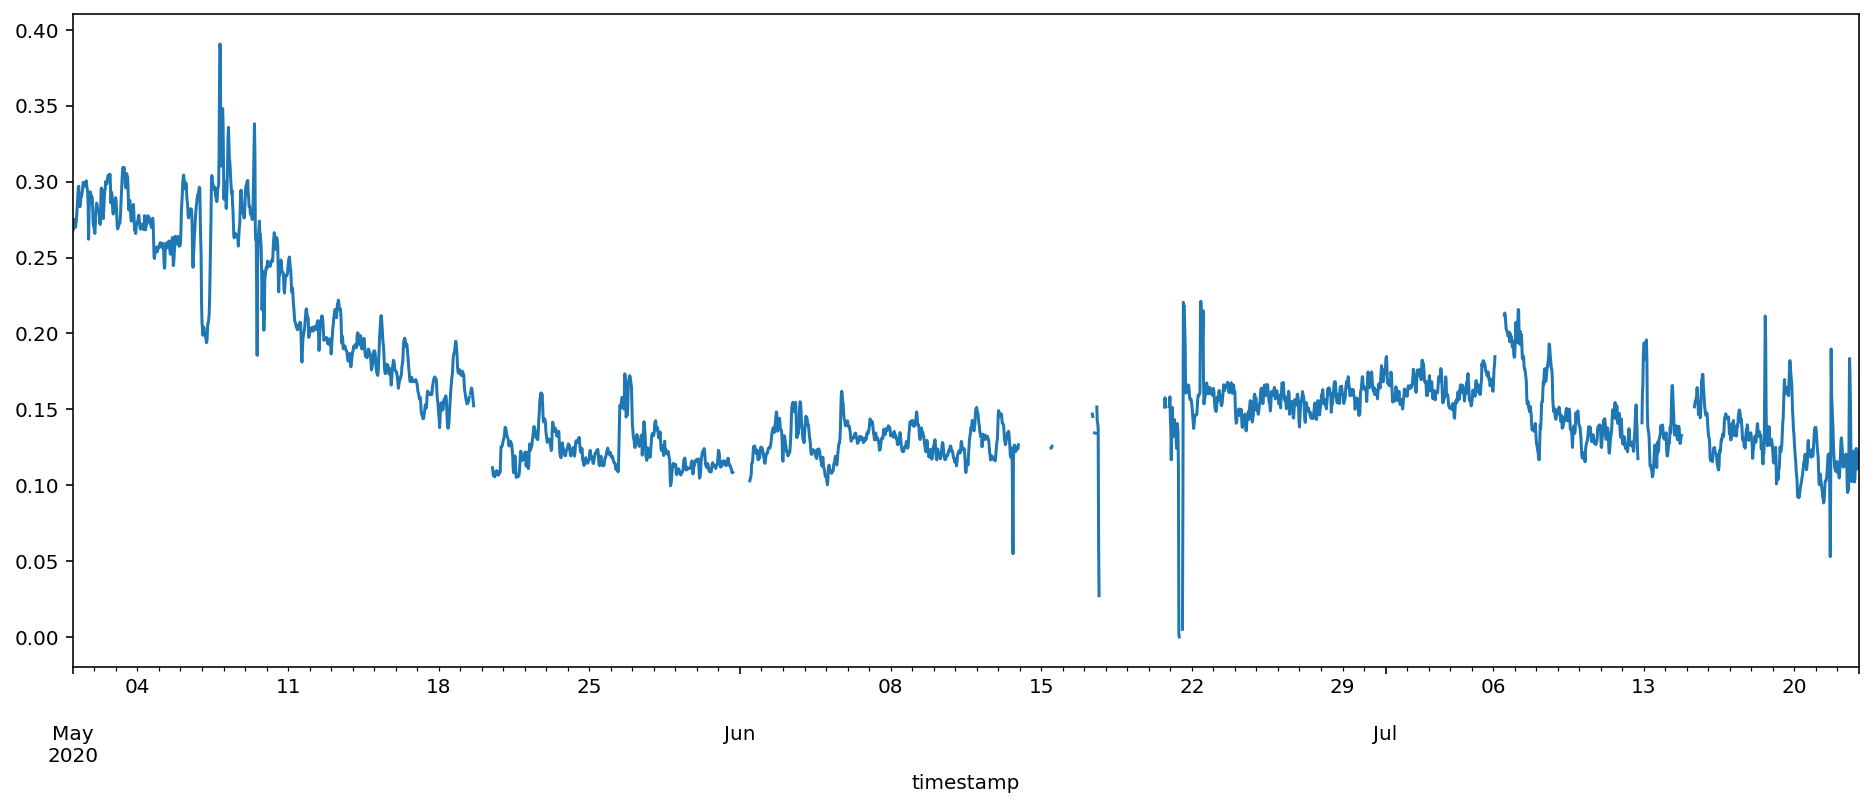

In [216]:
test['A_CH4'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

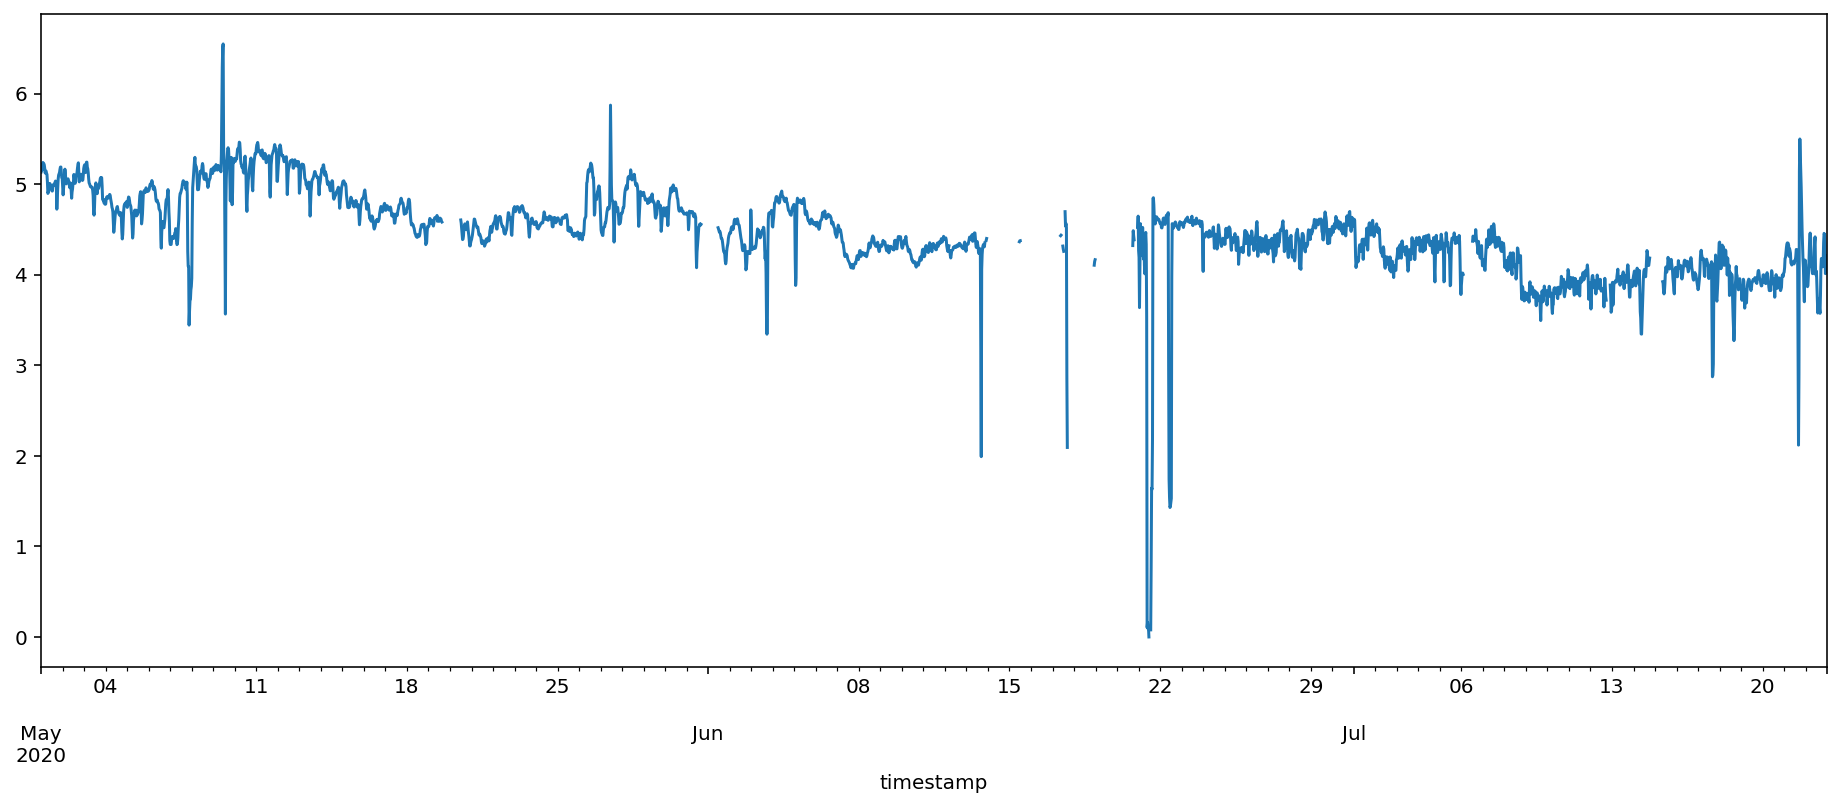

In [217]:
test['A_C2H6'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

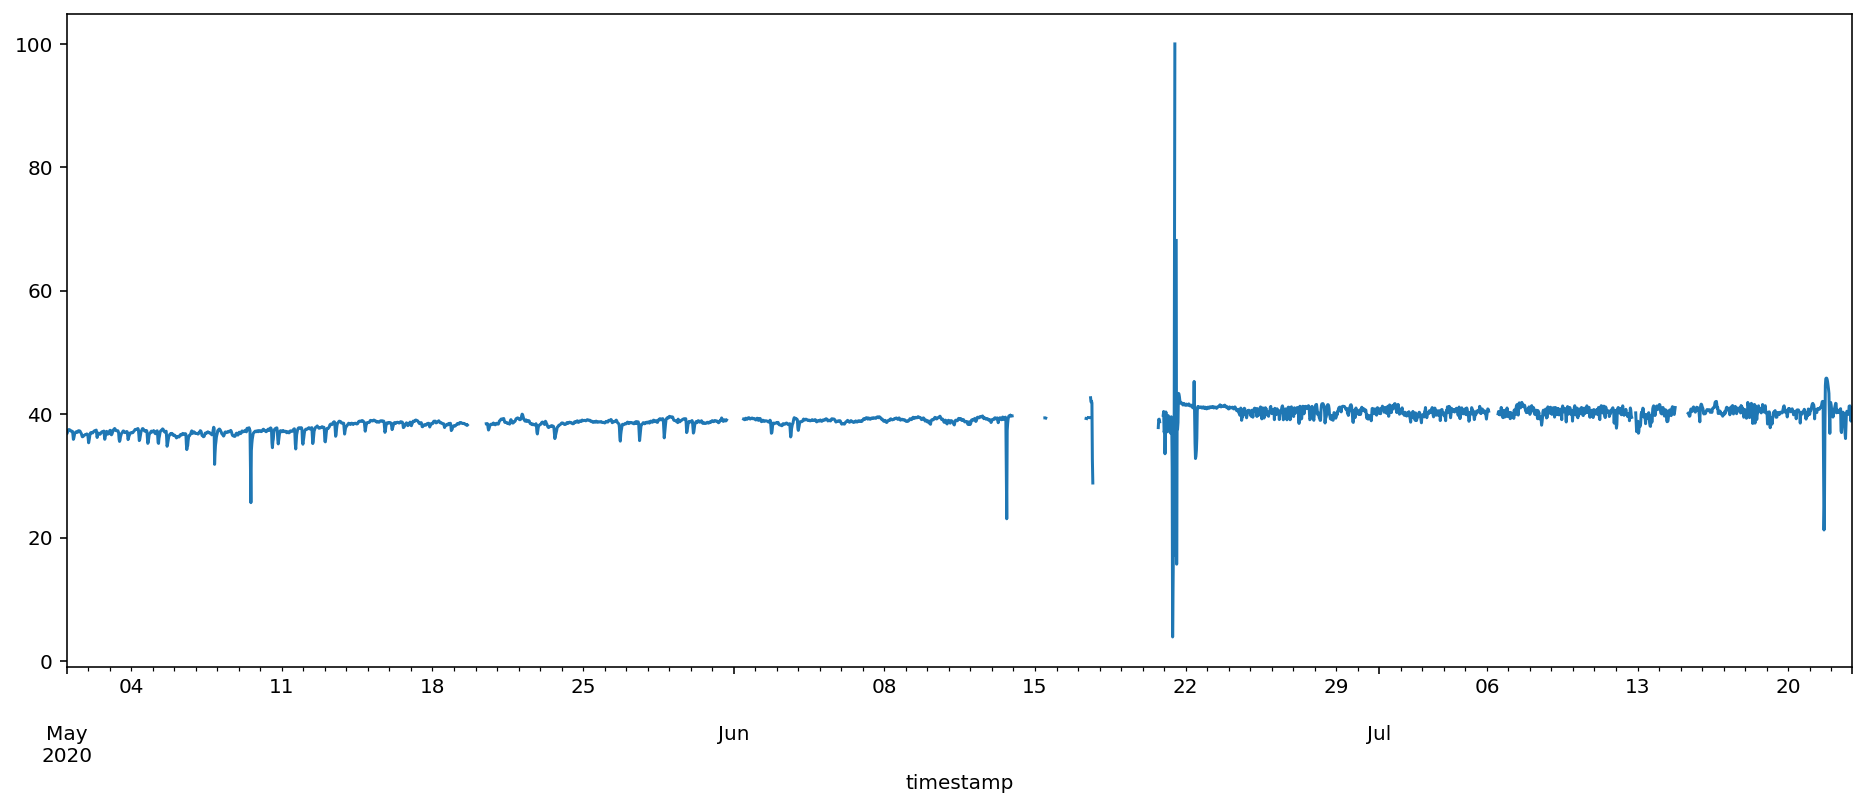

In [218]:
test['A_C3H8'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

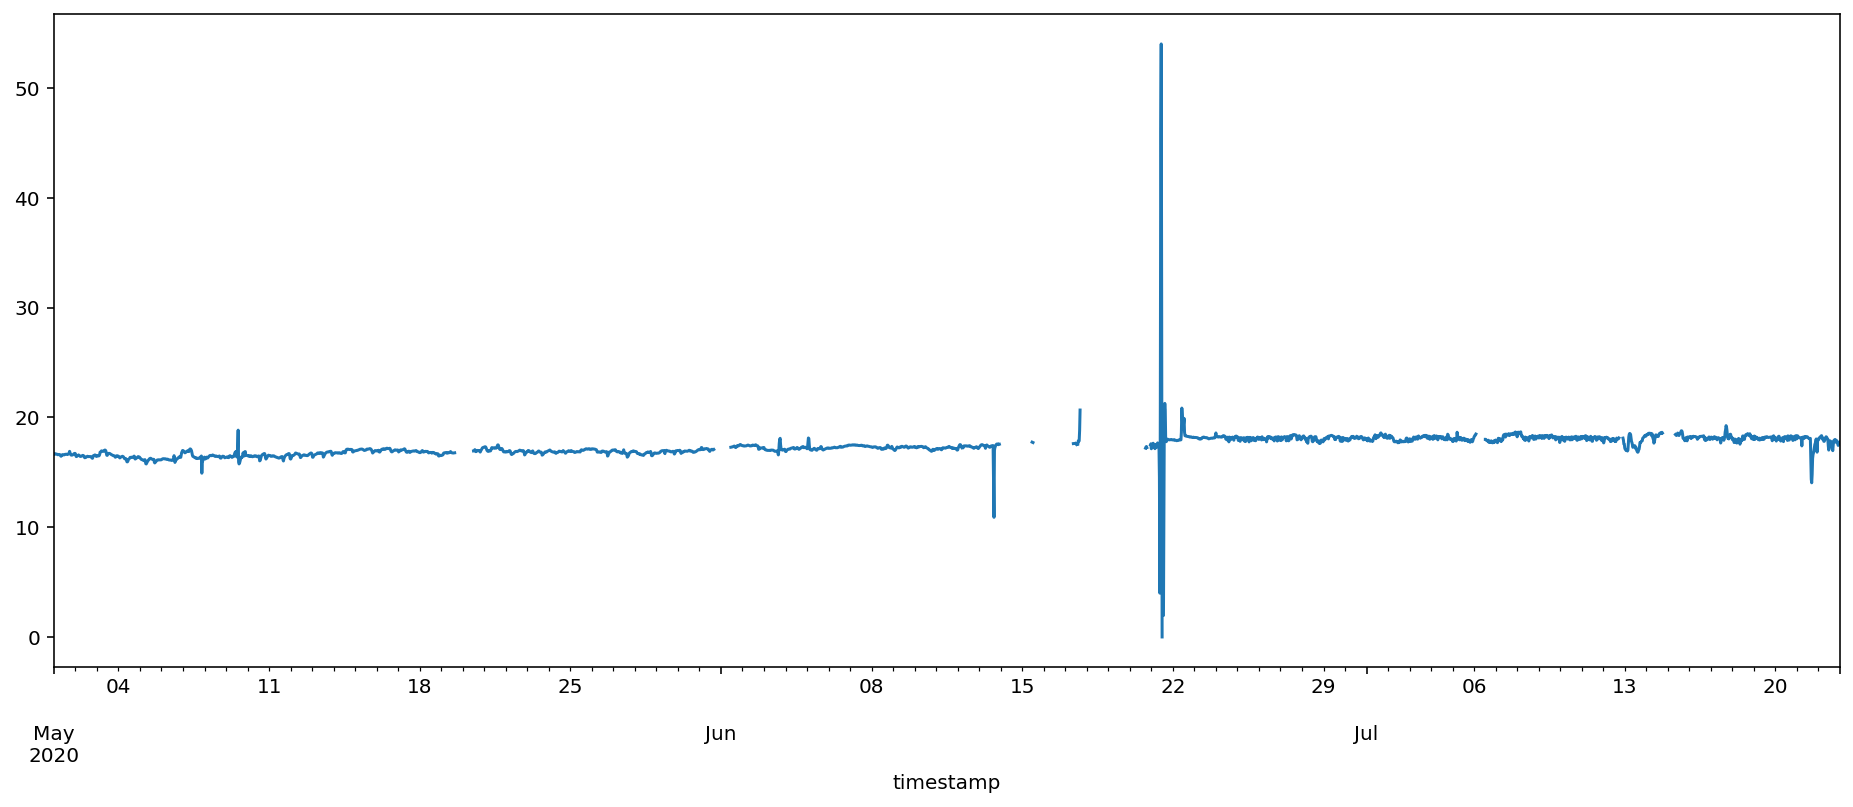

In [219]:
test['A_iC4H10'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

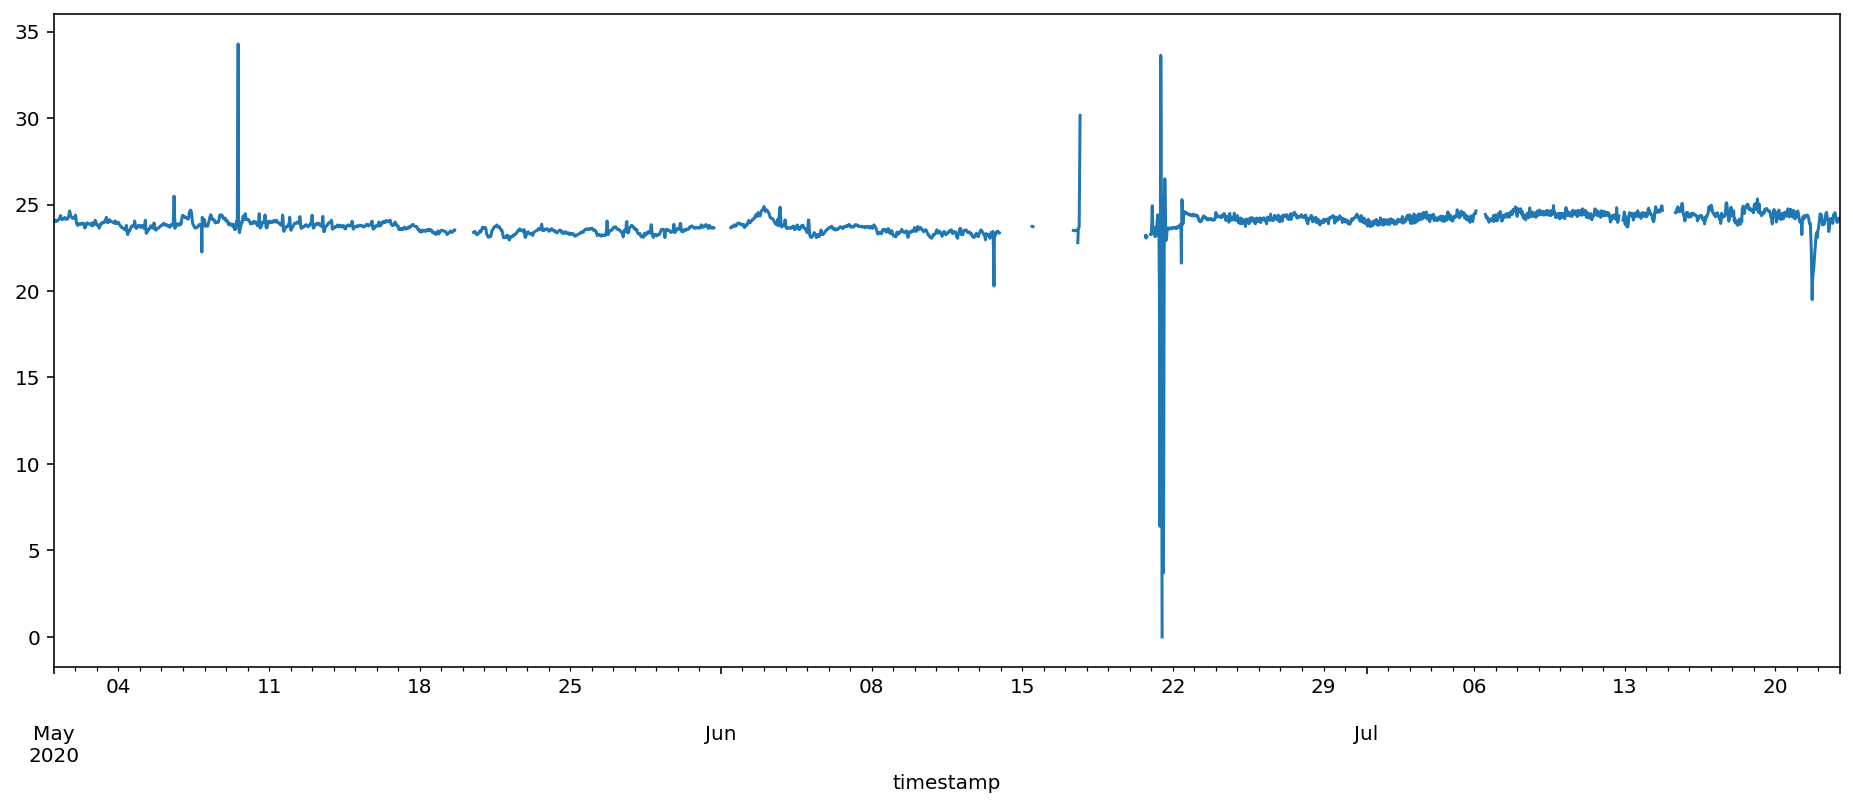

In [220]:
test['A_nC4H10'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

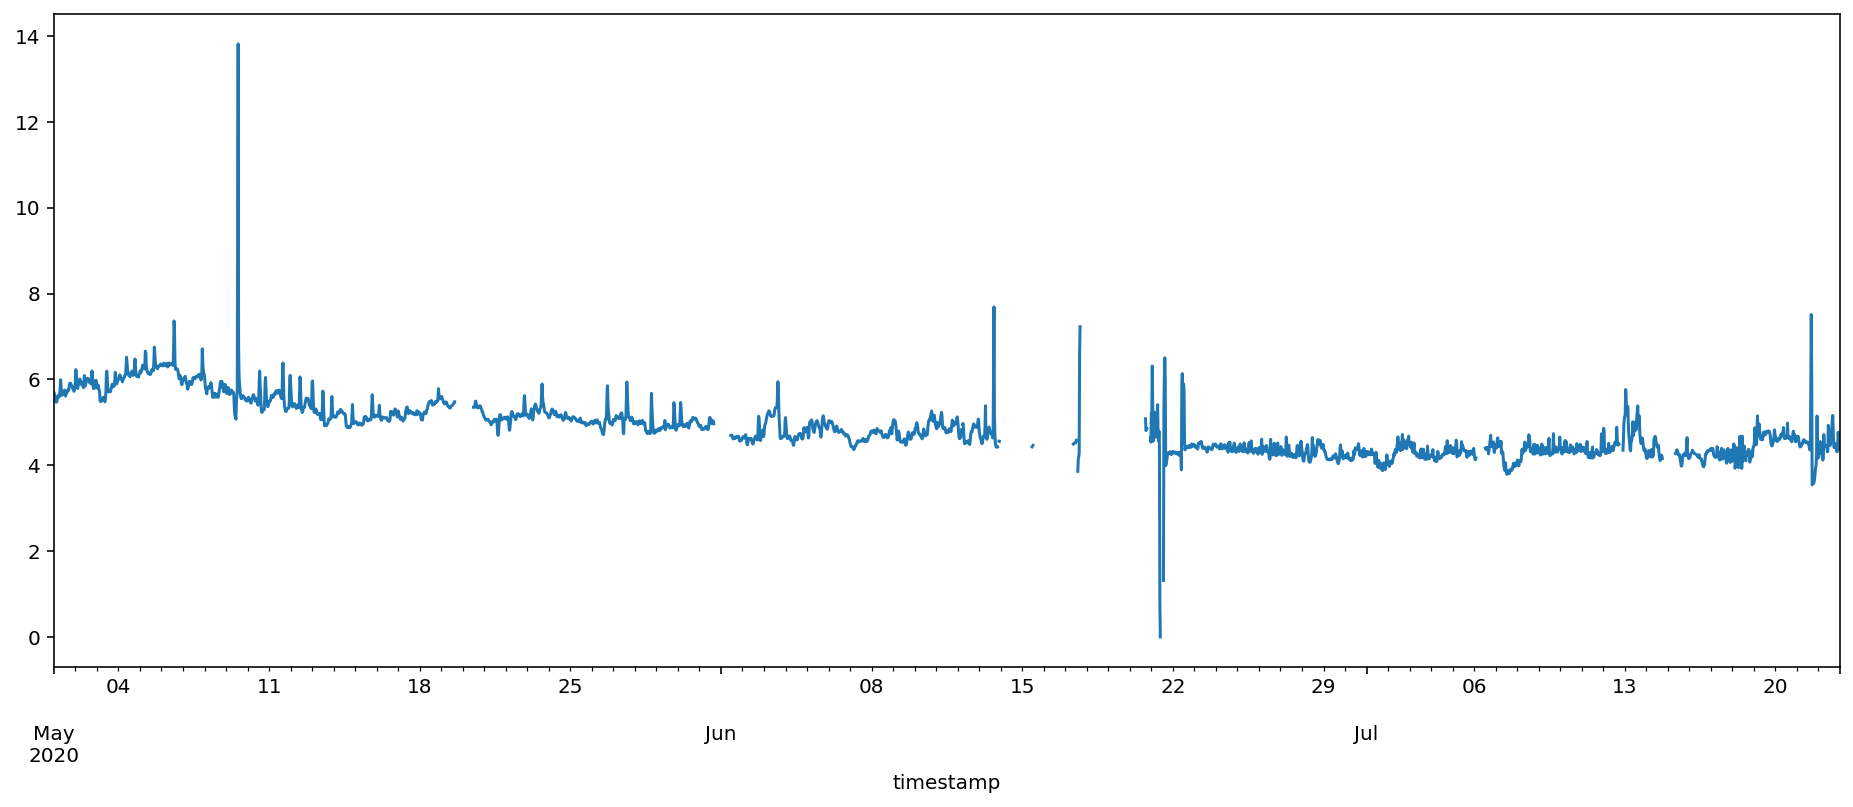

In [221]:
test['A_iC5H12'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

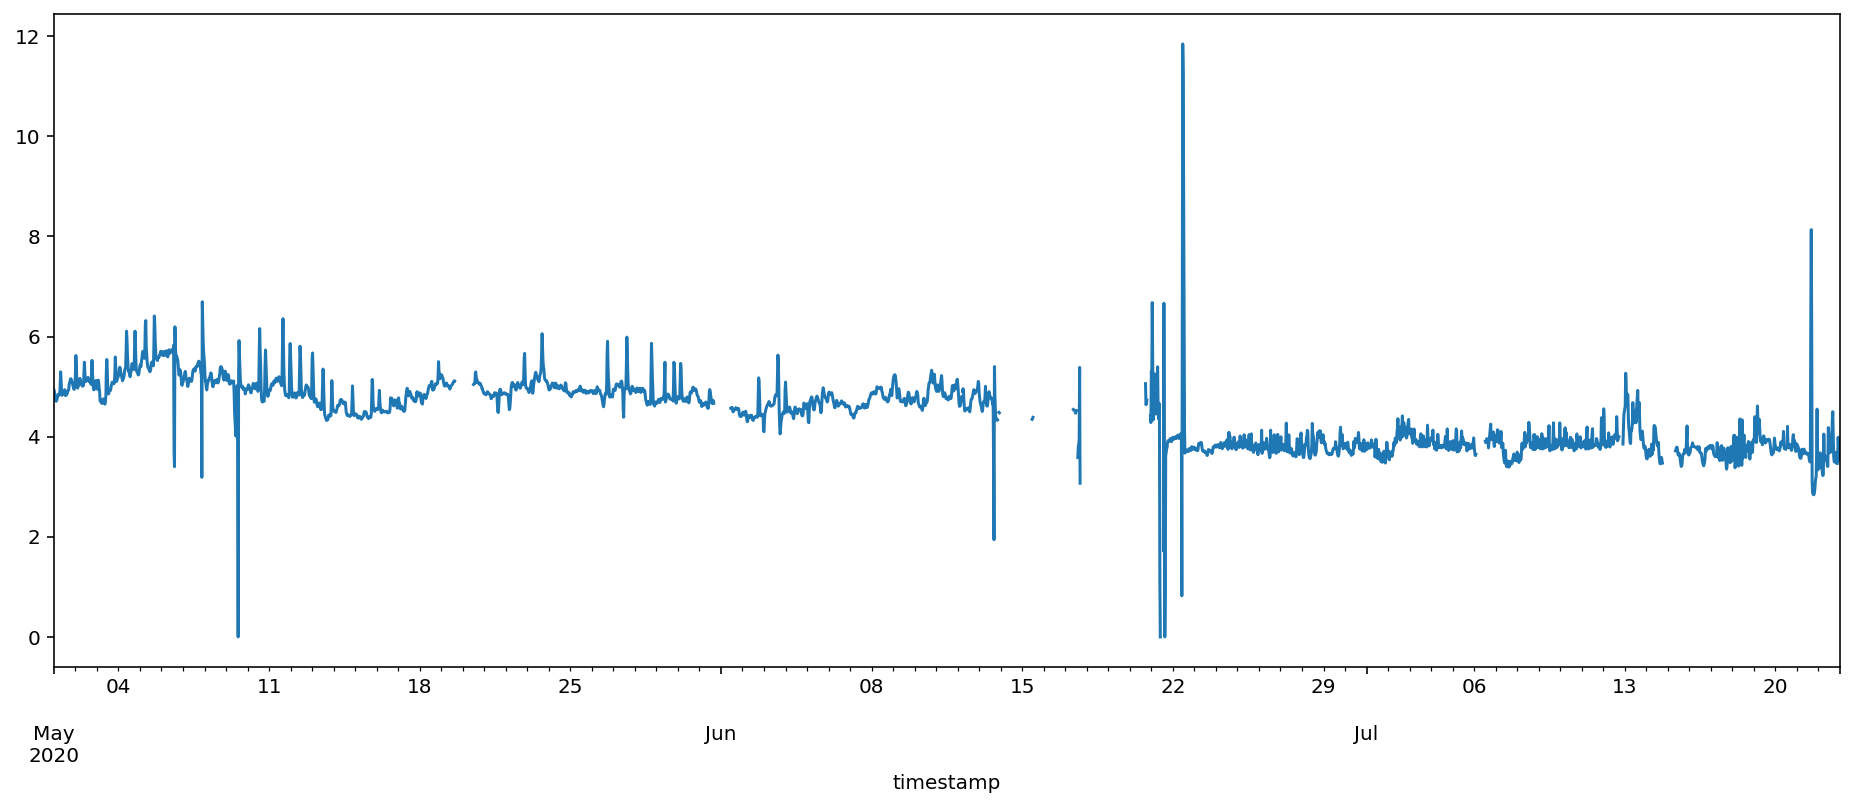

In [222]:
test['A_nC5H12'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

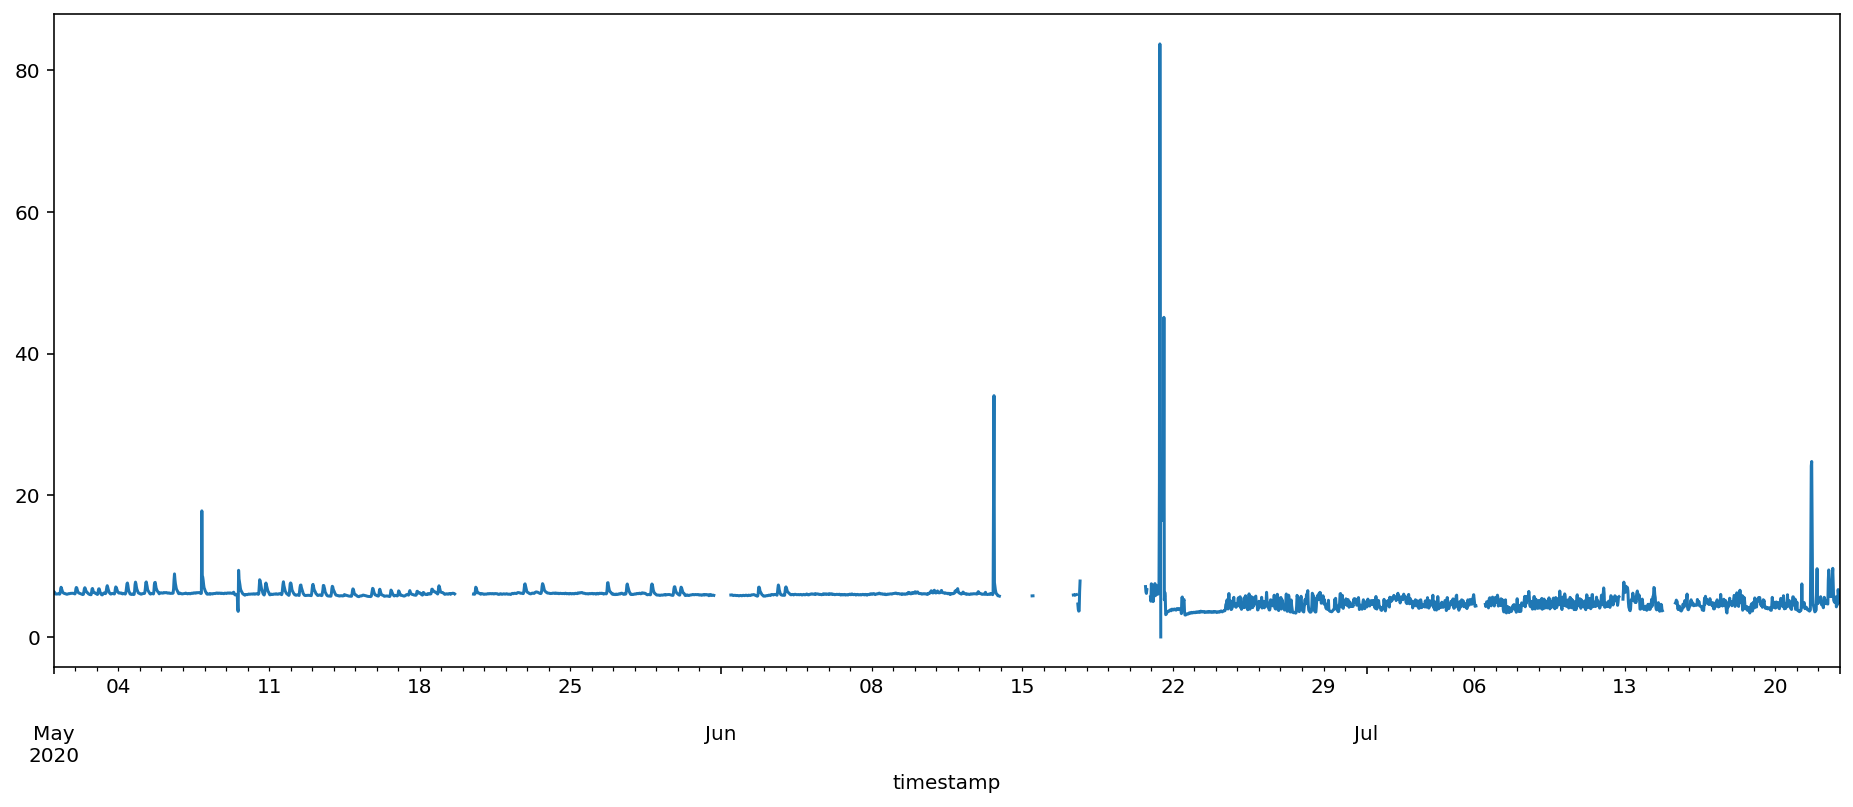

In [223]:
test['A_C6H14'].plot(figsize=(16, 6))

<AxesSubplot:xlabel='timestamp'>

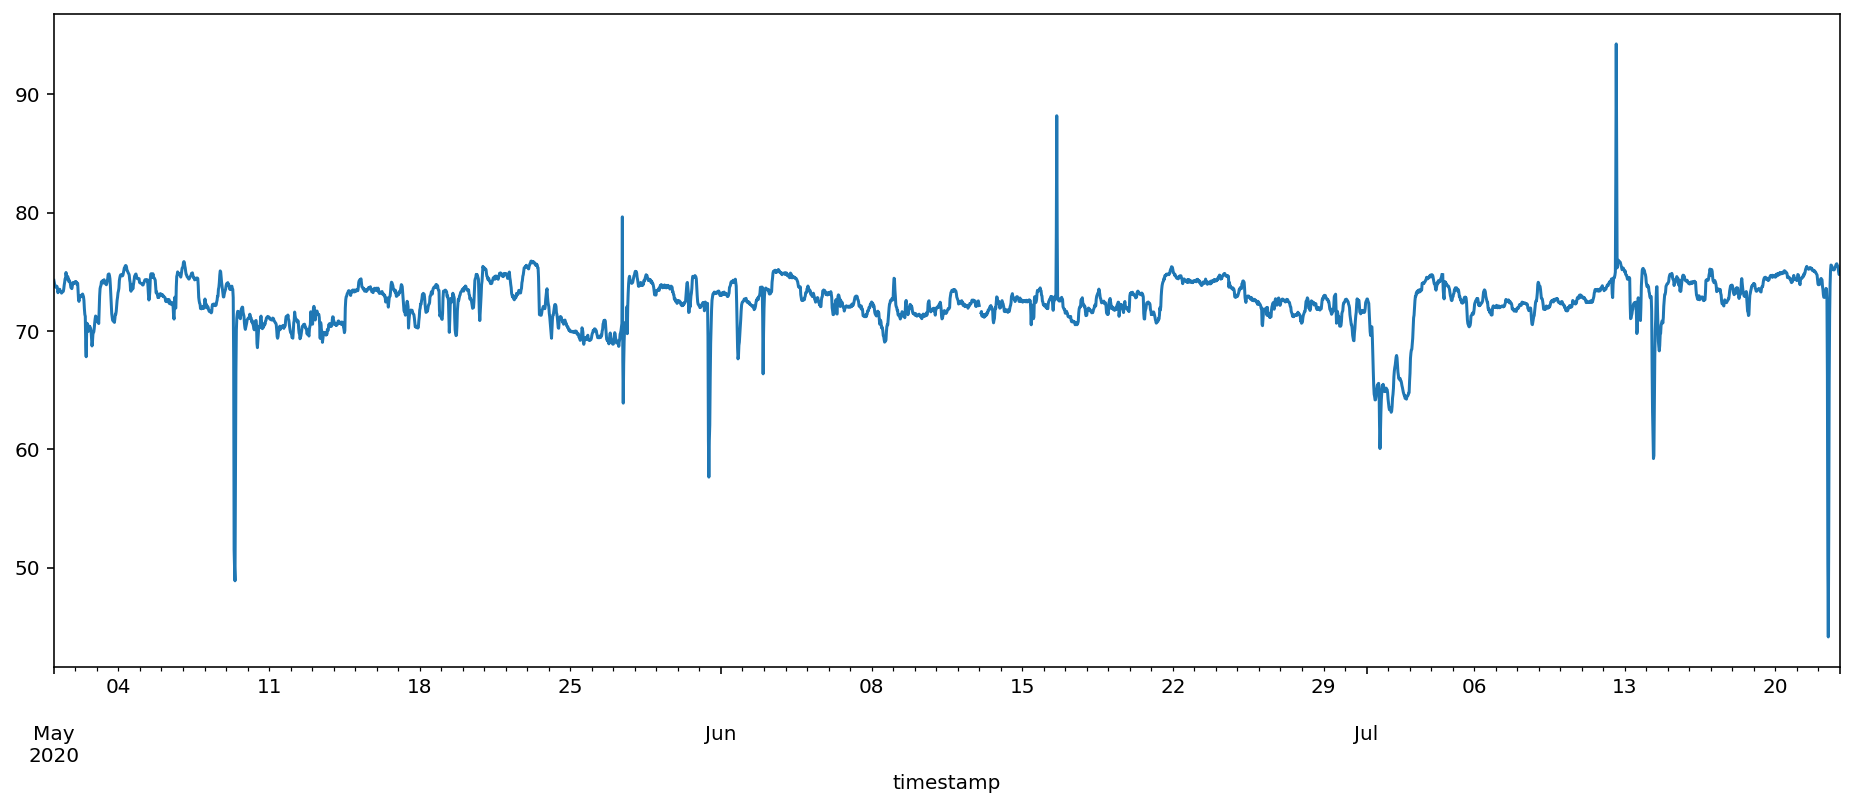

In [224]:
test['B_rate'].plot(figsize=(16, 6))

In [402]:
test.describe()

A_rate        A_CH4       A_C2H6       A_C3H8     A_iC4H10  \
count  2816.000000  3517.000000  3477.000000  3465.000000  3480.000000   
mean     70.051770     0.162330     4.493259    39.155483    17.380198   
std       1.909951     0.051055     0.385313     1.361693     0.670207   
min      61.439079     0.084754     3.603494    35.438803    15.828277   
25%      69.194661     0.126594     4.249902    38.425970    16.857121   
50%      70.159151     0.147864     4.471288    39.069757    17.273368   
75%      71.297572     0.173949     4.735459    40.298340    18.060046   
max      74.346769     0.348252     5.474893    41.988437    18.595153   

          A_nC4H10     A_iC5H12     A_nC5H12      A_C6H14       B_rate  
count  3490.000000  3469.000000  3333.000000  3508.000000  3857.000000  
mean     23.919636     4.869041     4.488222     5.520780    72.691690  
std       0.423179     0.568254     0.564801     0.947239     1.475518  
min      23.006020     3.931211     3.601349     0.000000    68.132754  
25%      23.584649     4.387161     3.881947     4.742783    71.759801  
50%      23.901281     4.779152     4.605488     5.940244    72.659521  
75%      24.258819     5.192084     4.927289     6.124897    73.841687  
max      25.102183     6.398289     5.899739     8.196776    75.973843

In [403]:
print(feb['A_rate'].mean())
print(test['A_rate'].mean())

65.82718119057675
70.05177035652092


In [404]:
print(feb['A_CH4'].mean())
print(test['A_CH4'].mean())

0.1790810785786611
0.162329699234677


In [405]:
print(feb['A_C2H6'].mean())
print(test['A_C2H6'].mean())

4.449284165299689
4.493258847962453


In [406]:
print(feb['A_C3H8'].mean())
print(test['A_C3H8'].mean())

38.428153632125245
39.15548269115997


In [407]:
print(feb['A_iC4H10'].mean())
print(test['A_iC4H10'].mean())

17.262486022243063
17.380197915797762


In [408]:
print(feb['A_nC4H10'].mean())
print(test['A_nC4H10'].mean())

24.10263147577391
23.919635888449996


In [409]:
print(feb['A_iC5H12'].mean())
print(test['A_iC5H12'].mean())

4.917252371376165
4.869041343822494


In [420]:
print(feb['A_nC5H12'].mean())
print(test['A_nC5H12'].mean())

4.747614590262571
4.488221673835961


In [411]:
print(feb['A_C6H14'].mean())
print(test['A_C6H14'].mean())

5.93887230847395
5.520780252446783


In [412]:
print(feb['B_rate'].mean())
print(test['B_rate'].mean())

67.90677447109694
72.6916897940766


In [470]:
test['A_CH4'].fillna(feb['A_CH4'].mean(), inplace=True)
test['A_C2H6'].fillna(feb['A_C2H6'].mean(), inplace=True)
test['A_C3H8'].fillna(feb['A_C3H8'].mean(), inplace=True)
test['A_iC4H10'].fillna(feb['A_iC4H10'].mean(), inplace=True)
test['A_nC4H10'].fillna(feb['A_nC4H10'].mean(), inplace=True)
test['A_nC5H12'].fillna(feb['A_nC5H12'].mean(), inplace=True)
test['A_iC5H12'].fillna(feb['A_iC5H12'].mean(), inplace=True)
test['A_C6H14'].fillna(feb['A_C6H14'].mean(), inplace=True)
test['A_rate'].fillna(feb['A_rate'].mean(), inplace=True)
test['B_rate'].fillna(feb['B_rate'].mean(), inplace=True)


In [427]:
B_C2H6 = feb['B_C2H6']
B_C3H8 = feb['B_C3H8']
B_iC4H10 = feb['B_iC4H10']
B_nC4H10 = feb['B_nC4H10']

In [428]:
feb.drop(['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10'], axis=1, inplace=True)
feb

A_rate     A_CH4    A_C2H6     A_C3H8   A_iC4H10  \
timestamp                                                                  
2020-02-09 00:00:00  65.725254  0.144524  2.737562  42.203553  18.395980   
2020-02-09 00:30:00  65.725254  0.153580  2.732064  42.253690  18.189257   
2020-02-09 01:00:00  65.725254  0.157296  2.726765  42.091440  18.040847   
2020-02-09 01:30:00  65.725254  0.146211  2.728743  42.052320  18.102822   
2020-02-09 02:00:00  65.725254  0.130078  2.705980  42.054647  18.288487   
...                        ...       ...       ...        ...        ...   
2020-04-30 21:30:00  72.009730  0.284151  4.936343  35.758852  16.473834   
2020-04-30 22:00:00  71.854180  0.282501  4.960453  35.877193  16.448487   
2020-04-30 22:30:00  71.783273  0.277686  5.013878  36.271557  16.500147   
2020-04-30 23:00:00  71.717743  0.271106  5.080144  36.616673  16.559533   
2020-04-30 23:30:00  71.730325  0.265635  5.069165  36.602453  16.649167   

                      A_nC4H10  A_iC5H12  A_nC5H12   A_C6H14     B_rate  
timestamp                                                                
2020-02-09 00:00:00  25.116770  4.265102  3.696698  5.786414  67.379870  
2020-02-09 00:30:00  25.016380  4.318525  3.783097  5.786414  67.379870  
2020-02-09 01:00:00  24.992053  4.407098  3.908029  5.786414  67.379870  
2020-02-09 01:30:00  25.027353  4.415327  3.885792  5.786414  67.379870  
2020-02-09 02:00:00  25.119287  4.391632  3.790096  5.786414  67.379870  
...                        ...       ...       ...       ...        ...  
2020-04-30 21:30:00  24.318968  6.069360  5.527463  6.577563  74.183355  
2020-04-30 22:00:00  24.074193  5.981357  5.407256  6.915378  74.213066  
2020-04-30 22:30:00  24.010123  5.829363  5.160329  6.884173  74.144367  
2020-04-30 23:00:00  24.008848  5.750492  5.017941  6.642076  74.320575  
2020-04-30 23:30:00  24.150503  5.752792  4.997528  6.459137  74.327170  

[3936 rows x 10 columns]

In [426]:
from catboost import CatBoostRegressor

In [429]:
cbr_B_C2H6 = CatBoostRegressor(loss_function='MAE', iterations=500)
cbr_B_C2H6.fit(feb, B_C2H6)

cbr_B_C3H8 = CatBoostRegressor(loss_function='MAE', iterations=500)
cbr_B_C3H8.fit(feb, B_C3H8)

cbr_B_iC4H10 = CatBoostRegressor(loss_function='MAE', iterations=500)
cbr_B_iC4H10.fit(feb, B_iC4H10)

cbr_B_nC4H10 = CatBoostRegressor(loss_function='MAE', iterations=500)
cbr_B_nC4H10.fit(feb, B_nC4H10)

0:	learn: 0.5408639	total: 133ms	remaining: 13.2s
1:	learn: 0.5318357	total: 143ms	remaining: 6.99s
2:	learn: 0.5227745	total: 151ms	remaining: 4.88s
3:	learn: 0.5139463	total: 160ms	remaining: 3.83s
4:	learn: 0.5058779	total: 165ms	remaining: 3.14s
5:	learn: 0.4977589	total: 169ms	remaining: 2.65s
6:	learn: 0.4898627	total: 172ms	remaining: 2.29s
7:	learn: 0.4816394	total: 176ms	remaining: 2.02s
8:	learn: 0.4737344	total: 179ms	remaining: 1.81s
9:	learn: 0.4654434	total: 182ms	remaining: 1.64s
10:	learn: 0.4585259	total: 185ms	remaining: 1.5s
11:	learn: 0.4513647	total: 189ms	remaining: 1.38s
12:	learn: 0.4445648	total: 192ms	remaining: 1.29s
13:	learn: 0.4385965	total: 195ms	remaining: 1.2s
14:	learn: 0.4319999	total: 199ms	remaining: 1.13s
15:	learn: 0.4255331	total: 202ms	remaining: 1.06s
16:	learn: 0.4195309	total: 206ms	remaining: 1s
17:	learn: 0.4138884	total: 209ms	remaining: 954ms
18:	learn: 0.4091115	total: 213ms	remaining: 907ms
19:	learn: 0.4038286	total: 216ms	remaining: 8

2:	learn: 0.4217337	total: 13.2ms	remaining: 426ms
3:	learn: 0.4159912	total: 16.2ms	remaining: 389ms
4:	learn: 0.4103027	total: 19.3ms	remaining: 367ms
5:	learn: 0.4054723	total: 22.5ms	remaining: 353ms
6:	learn: 0.4011367	total: 25.5ms	remaining: 339ms
7:	learn: 0.3959949	total: 28.6ms	remaining: 329ms
8:	learn: 0.3918055	total: 31.6ms	remaining: 320ms
9:	learn: 0.3871751	total: 34.8ms	remaining: 314ms
10:	learn: 0.3826466	total: 37.9ms	remaining: 306ms
11:	learn: 0.3787975	total: 40.8ms	remaining: 300ms
12:	learn: 0.3745735	total: 43.9ms	remaining: 294ms
13:	learn: 0.3712154	total: 47.2ms	remaining: 290ms
14:	learn: 0.3678894	total: 50.1ms	remaining: 284ms
15:	learn: 0.3646422	total: 53.1ms	remaining: 279ms
16:	learn: 0.3619428	total: 56ms	remaining: 273ms
17:	learn: 0.3592774	total: 58.8ms	remaining: 268ms
18:	learn: 0.3566980	total: 61.8ms	remaining: 263ms
19:	learn: 0.3533834	total: 64.7ms	remaining: 259ms
20:	learn: 0.3508145	total: 67.7ms	remaining: 255ms
21:	learn: 0.3481181	t

78:	learn: 0.2899909	total: 235ms	remaining: 62.4ms
79:	learn: 0.2891009	total: 238ms	remaining: 59.5ms
80:	learn: 0.2885077	total: 241ms	remaining: 56.5ms
81:	learn: 0.2875429	total: 244ms	remaining: 53.6ms
82:	learn: 0.2869673	total: 247ms	remaining: 50.6ms
83:	learn: 0.2862556	total: 250ms	remaining: 47.7ms
84:	learn: 0.2851100	total: 253ms	remaining: 44.7ms
85:	learn: 0.2841313	total: 256ms	remaining: 41.8ms
86:	learn: 0.2834727	total: 260ms	remaining: 38.8ms
87:	learn: 0.2829177	total: 263ms	remaining: 35.8ms
88:	learn: 0.2822008	total: 265ms	remaining: 32.8ms
89:	learn: 0.2814317	total: 268ms	remaining: 29.8ms
90:	learn: 0.2807208	total: 271ms	remaining: 26.8ms
91:	learn: 0.2801563	total: 274ms	remaining: 23.9ms
92:	learn: 0.2798731	total: 277ms	remaining: 20.9ms
93:	learn: 0.2788931	total: 280ms	remaining: 17.9ms
94:	learn: 0.2780927	total: 284ms	remaining: 14.9ms
95:	learn: 0.2775962	total: 286ms	remaining: 11.9ms
96:	learn: 0.2770255	total: 289ms	remaining: 8.95ms
97:	learn: 0

In [430]:
cbr_B_C2H6_predict = cbr_B_C2H6.predict(test)

cbr_B_C3H8_predict = cbr_B_C3H8.predict(test)

cbr_B_iC4H10_predict = cbr_B_iC4H10.predict(test)

cbr_B_nC4H10_predict = cbr_B_nC4H10.predict(test)

In [431]:
cbr_B_C2H6_predict = pd.Series(cbr_B_C2H6_predict)
cbr_B_C3H8_predict = pd.Series(cbr_B_C3H8_predict)
cbr_B_iC4H10_predict = pd.Series(cbr_B_iC4H10_predict)
cbr_B_nC4H10_predict = pd.Series(cbr_B_nC4H10_predict)

In [432]:
sumb1 = pd.concat([cbr_B_C2H6_predict, cbr_B_C3H8_predict, cbr_B_iC4H10_predict, cbr_B_nC4H10_predict], axis=1, join='outer')

In [433]:
stam = sample1['timestamp']
stam = pd.concat([stam, sumb1], axis=1, join='outer')
stam

timestamp         0          1          2          3
0    2020-05-01 00:00:00  4.952504  36.247661  16.511191  24.451698
1    2020-05-01 00:30:00  4.959185  36.271517  16.502007  24.438547
2    2020-05-01 01:00:00  4.909321  36.418445  16.469046  24.436246
3    2020-05-01 01:30:00  4.980212  36.438245  16.450211  24.415520
4    2020-05-01 02:00:00  4.964837  36.427599  16.428285  24.400732
...                  ...       ...        ...        ...        ...
3979 2020-07-22 21:30:00  3.234139  40.867892  17.666432  24.686100
3980 2020-07-22 22:00:00  3.947611  38.885266  17.063453  24.286176
3981 2020-07-22 22:30:00  3.913175  39.994759  17.112381  24.459190
3982 2020-07-22 23:00:00  3.093684  40.931539  17.670450  24.683466
3983 2020-07-22 23:30:00  3.283629  40.518917  17.594843  24.616340

[3984 rows x 5 columns]

In [434]:
stam.columns = ['timestamp', 'B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10']

In [435]:
stam

timestamp    B_C2H6     B_C3H8   B_iC4H10   B_nC4H10
0    2020-05-01 00:00:00  4.952504  36.247661  16.511191  24.451698
1    2020-05-01 00:30:00  4.959185  36.271517  16.502007  24.438547
2    2020-05-01 01:00:00  4.909321  36.418445  16.469046  24.436246
3    2020-05-01 01:30:00  4.980212  36.438245  16.450211  24.415520
4    2020-05-01 02:00:00  4.964837  36.427599  16.428285  24.400732
...                  ...       ...        ...        ...        ...
3979 2020-07-22 21:30:00  3.234139  40.867892  17.666432  24.686100
3980 2020-07-22 22:00:00  3.947611  38.885266  17.063453  24.286176
3981 2020-07-22 22:30:00  3.913175  39.994759  17.112381  24.459190
3982 2020-07-22 23:00:00  3.093684  40.931539  17.670450  24.683466
3983 2020-07-22 23:30:00  3.283629  40.518917  17.594843  24.616340

[3984 rows x 5 columns]

In [436]:
sub

timestamp    B_C2H6     B_C3H8   B_iC4H10   B_nC4H10
0     2020-05-01 00:00:00  5.102720  35.822035  16.425288  24.584632
1     2020-05-01 00:30:00  5.107086  35.822289  16.444356  24.595867
2     2020-05-01 01:00:00  4.993856  35.935303  16.456353  24.619493
3     2020-05-01 01:30:00  5.090856  36.199962  16.447106  24.556536
4     2020-05-01 02:00:00  5.046516  36.212047  16.445756  24.569406
...                   ...       ...        ...        ...        ...
3979  2020-07-22 21:30:00  4.005209  39.849308  17.152498  23.981673
3980  2020-07-22 22:00:00  3.780702  39.811960  17.075966  24.208224
3981  2020-07-22 22:30:00  3.858655  39.841927  16.938540  24.361972
3982  2020-07-22 23:00:00  3.646843  39.939253  17.165431  24.321201
3983  2020-07-22 23:30:00  3.882746  39.569015  17.122805  24.069063

[3984 rows x 5 columns]

In [437]:
stam.to_csv('feb_cbr.csv')